# City Size Distribution Analysis

This note book produces Lorenz Curves and Zipf Law Estimations, along with gini coefficents.

Code adapted for Lorzen curves from: https://zhiyzuo.github.io/Plot-Lorenz/

-Cascade 2019-02-04

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D
from scipy import stats as ss

## Data In

In [2]:
# File paths

data_raw = '../../data/raw/'
data_temp = '../../temp_data/'
data_interim = '../../interim/'
data_analysis = '../../temp_data/ERL_data/Data20190222/'
erl_data = '../../temp_data/ERL_data/'
downloads = '/Users/cascade/Downloads/'

In [3]:
# Data

# GHS2000 = gpd.read_file(erl_data+'Data20190222/GHS_POP_GPW42000_final20190122.shp')
# GHS2015 = gpd.read_file(erl_data+'Data20190222/GHS_POP_GPW42015_final20190122.shp')
# WP2000 = gpd.read_file(erl_data+'Data20190222/AFR_PPP_2000_adj_v2_final20190122.shp')
# WP2015 = gpd.read_file(erl_data+'Data20190222/AFR_PPP_2015_adj_v2_final20190122.shp')
# LS2015 = gpd.read_file(erl_data+'Data20190222/WPE_1KM_2016_final20190122.shp')
# WPE2016 = gpd.read_file(erl_data+'Data20190222/LS15_final20190122.shp')

# Data with Rain Zones & Regions & FIDs Dropped (2019-02-13)

# GHS2000 = gpd.read_file(erl_data+'GHS_POP_GPW42000_20190213.shp')
# GHS2015 = gpd.read_file(erl_data+'GHS_POP_GPW42015_20190213.shp')
# WP2000 = gpd.read_file(erl_data+'AFR_PPP_2000_adj_v2_20190213.shp')
# WP2015 = gpd.read_file(erl_data+'AFR_PPP_2015_adj_v2_20190213.shp')
# LS2015 = gpd.read_file(erl_data+'WPE_1KM_2016_20190213.shp')
# WPE2016 = gpd.read_file(erl_data+'LS15_20190213.shp')

# Load data: ...20190222.shp files have FIDs removed, S Sudan added, rainfall zones, and regions

GHS2000 = gpd.read_file(data_analysis+'GHS_POP_GPW42000_20190222.shp', driver = 'ESRI Shapefile')
GHS2015 = gpd.read_file(data_analysis+'GHS_POP_GPW42015_20190222.shp', driver = 'ESRI Shapefile')
WP2000 = gpd.read_file(data_analysis+'AFR_PPP_2000_adj_v2_20190222.shp', driver = 'ESRI Shapefile')
WP2015 = gpd.read_file(data_analysis+'AFR_PPP_2015_adj_v2_20190222.shp', driver = 'ESRI Shapefile')
LS2015 = gpd.read_file(data_analysis+'WPE_1KM_2016_20190222.shp', driver = 'ESRI Shapefile')
WPE2016 = gpd.read_file(data_analysis+'LS15_20190222.shp', driver = 'ESRI Shapefile')

In [4]:
# List of datasets

datasets_in = [GHS2000, GHS2015, WP2000, WP2015, LS2015, WPE2016]
datasets_in15 = [GHS2015, WP2015, LS2015, WPE2016]

## Functions

In [6]:
def gini(series):
    
    "Function calculates gini coefficent based on https://zhiyzuo.github.io/Plot-Lorenz/"
    ## series to array
    arr = series.values
    
    ## first sort
    sorted_arr = arr.copy(np.array)
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

In [ ]:
def lorenz_curve(X):
    
    "Function plots Lorenz curves based on https://zhiyzuo.github.io/Plot-Lorenz/"
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0) 
    X_lorenz[0], X_lorenz[-1]
    fig, ax = plt.subplots(figsize=[6,6])
    ## scatter plot of Lorenz curve
    ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
               marker='x', color='darkgreen', s=100)
    ## line plot of equality
    ax.plot([0,1], [0,1], color='k')

In [ ]:
def gini_group(gpd_df, group, value, outcol):
    "Function calculates gini coef. for by groups for a pandas data frame. Returns data frame"
    
    gini = test.groupby(group).value.agg(gini)
    df = pd.DataFrame()
    df[group] = out.keys()
    df[outcol] = out.values

    return df

In [ ]:
def gini_alt(series):
    
    "Function calculates gini coefficent based on https://www.jstor.org/stable/pdf/177185.pdf "
    
    arr = series.values
    
    # first sort
    sorted_arr = arr.copy(np.array)
    sorted_arr.sort()
    
    # parameters
    n = arr.size
    est_ = (n**2)*sorted_arr.mean()
    
    # equation
    sum([ (i+1) *yi  for i, yi in enumerate(sorted_arr)])
    
    weighted_sum = sum([(((2.* (i+1)) - (n) - 1) * yi) for i, yi in enumerate(sorted_arr)])
    
    # for unbiased estimator use
    # const_ = (n / (n - 1.))
    # return weighted_sum / est_ * const_
    
    return weighted_sum / est_

## Plots

In [ ]:
# Select Data for Lorenz

# All Africa

#area = 'Africa'
# X = np.sort(np.array(GHS2000.PopTot))
# Y = np.sort(np.array(GHS2015.PopTot))

# # By group
col = 'rain_zone' # column
area = 'Humid' # geography to distribut 

X = np.sort(np.array(GHS2000[GHS2000[col] == area].PopTot))
Y = np.sort(np.array(GHS2015[GHS2015[col] == area].PopTot))


print(len(X))
print(len(Y))

# Set Limits
X = X[(X < 5*10**6)]
Y = Y[(Y < 5*10**6)]

print(len(X))
print(len(Y))

# Data for curve one
X_lorenz = X.cumsum() / X.sum()
X_lorenz = np.insert(X_lorenz, 0, 0)
X_lorenz[0], X_lorenz[-1]

# Data for curve two 
Y_lorenz = Y.cumsum() / Y.sum()
Y_lorenz = np.insert(Y_lorenz, 0, 0)
Y_lorenz[0], Y_lorenz[-1]

In [ ]:
df = pd.DataFrame()
df['pop'] = np.insert(Y, 0,0)
df['pct'] = Y_lorenz
df['rank'] = np.arange(Y_lorenz.size)/(Y_lorenz.size-1)
df.iloc[560:]

In [ ]:
# Lorenz Curve Plot

%matplotlib inline

## Size & number
sns.set(font_scale=3)
fig, ax1 = plt.subplots(nrows=1, ncols=1,  figsize=(10, 10))


# Curve Plots
# Alpha for Botswana and S. Leone is 0.7, else 0.5
ax1.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
           marker='.', color='Green', s=100, alpha = 0.7)

ax1.scatter(np.arange(Y_lorenz.size)/(Y_lorenz.size-1), Y_lorenz, 
           marker='.', color='#ff01bc', s=100, alpha = 0.7)

# Title
plt.title(area)


# Legend
leg = ['GHS-Pop 2000', 'GHS-Pop 2015']
plt.legend(leg,loc=2, markerscale=3)

## line plot of of 90% 40% 
# ax1.plot([0.9,0.9], [0,1] , color='k', alpha = 0.25)
# ax1.plot([0,1], [0.3,0.3] , color='k', alpha = 0.25)

#remove ticks
# ax.set_xticks([])
# ax.set_yticks([])

# Set Color
plt.grid(b=True, color = 'k', alpha = 0.5, marker = '.')

# plt.setp(ax1.xaxis.get_gridlines(), clip_path = [0,1])
# plt.setp(ax1.yaxis.get_gridlines(), clip_path = [[0,0], [1,1]])
plt.figure.frameon = True
ax1.set_facecolor('White')


fig.savefig('/Users/cascade/Desktop/'+area+'_Lorenz.png', dpi=700)



In [ ]:
# Select Data Zipf's law

# All Africa
# area = 'Africa'
# data1 = np.sort(np.array(GHS2000.PopTot))
# data2 = np.sort(np.array(GHS2015.PopTot))

# By country 
col = 'country' # column
area = 'Ethiopia' # geography to distribut 

data1 = np.sort(np.array(GHS2000[GHS2000[col] == area].PopTot))
data2 = np.sort(np.array(GHS2015[GHS2015[col] == area].PopTot))

print(len(data1))
print(len(data2))

# Set Limits
data1 = data1[(data1 < 5*10**6)]
data2 = data2[(data2 < 5*10**6)]

print(len(data1))
print(len(data2))

X1_zipf = data1 #sort the values
Y1_zipf = list(range(1, len(X1_zipf)+1)) # make a range
Y1_zipf = Y1_zipf[::-1] # Re order range

X1_zipf_log = np.log(X1_zipf)
Y1_zipf_log = np.log(Y1_zipf)

X2_zipf = data2
Y2_zipf = list(range(1, len(X2_zipf)+1))
Y2_zipf = Y2_zipf[::-1]

X2_zipf_log = np.log(X2_zipf)
Y2_zipf_log = np.log(Y2_zipf)

In [ ]:
# Zipf's law

## Size & number
sns.set(font_scale=3)
fig, ax1 = plt.subplots(nrows=1, ncols=1,  figsize=(10, 10))

# Plot
plt.scatter(X1_zipf_log, Y1_zipf_log , marker='.', color='purple', s=100, alpha = 0.7)
plt.scatter(X2_zipf_log, Y2_zipf_log , marker='.', color='orange', s=100, alpha = 0.7)

# Legend
# leg = ['GHS-Pop 2000', 'GHS-Pop 2015']
# plt.legend(leg,loc=1, markerscale=3, facecolor = 'white', edgecolor = 'white')

# Fit Lines
sns.regplot(X1_zipf_log, Y1_zipf_log, color = 'purple')
sns.regplot(X2_zipf_log, Y2_zipf_log, color = 'orange')

# Title
plt.title(area)

# Labels
plt.xlabel('')
plt.ylabel('')

# Set Ticks
plt.xticks([np.log(10**4), np.log(10**5), np.log(10**6), np.log(10**7)], 
           ['$10^4$', '$10^5$', '$10^6$', '$10^7$'])

plt.yticks([np.log(10), np.log(100), np.log(1000), np.log(10000),  np.log(100000)], 
           ['10', '$10^2$', '$10^3$', '$10^4$', '$10^5$'])

# Set Background Color
ax1.set_facecolor('White')

axes = plt.gca()
axes.set_xlim([7,16])
#axes.set_xlim([min(X2_zipf_log), max(X2_zipf_log)])
axes.set_ylim([1,8])

fig.savefig('/Users/cascade/Desktop/'+area+'_Zipf.png', dpi=700)

## Analysis

In [24]:
# Subset of Countries 
# countries = ['Morocco', 'Mali', 'Senegal', 'Sierra Leone', 'Ghana',
#             'Nigeria', 'Central African Republic', 'South Sudan',
#             'Uganda', 'Kenya', 'Ethiopia', 'Angola', 'Botswana',
#             'Zambia', 'South Africa']

# countries = ['Mali', 'Ghana', 'Nigeria', 'Kenya', 'Ethiopia', 'Botswana',
#             'Zambia', 'South Africa']

# All countries

countries = pd.Series(GHS2015.country, dtype="category")

countries = countries.cat.categories.tolist()
countries

['Algeria',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo-Brazzaville',
 "Côte d'Ivoire",
 'Djibouti',
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Ethiopia',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Kenya',
 'Lesotho',
 'Liberia',
 'Libya',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Rwanda',
 'Réunion',
 'Senegal',
 'Sierra Leone',
 'Somalia',
 'South Africa',
 'South Sudan',
 'Sudan',
 'Tanzania',
 'Togo',
 'Tunisia',
 'Uganda',
 'Zambia',
 'Zimbabwe']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:117: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/anaconda3/lib/python3.7/site-packages/scipy/stats/_stat

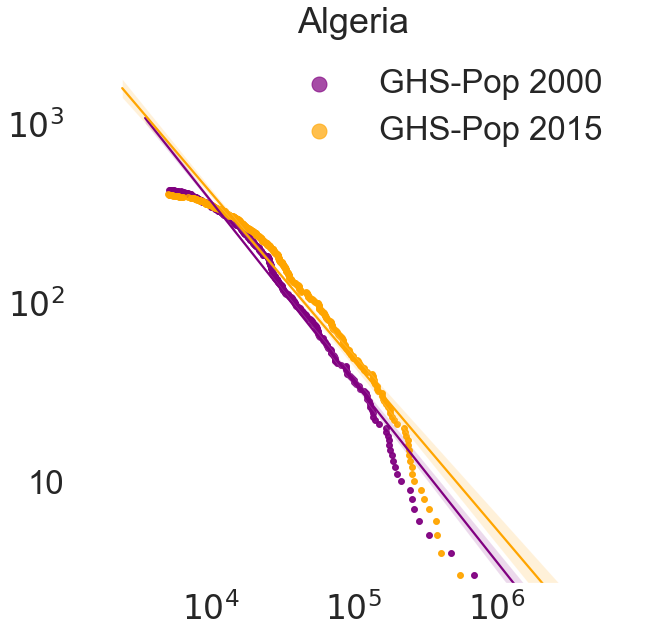

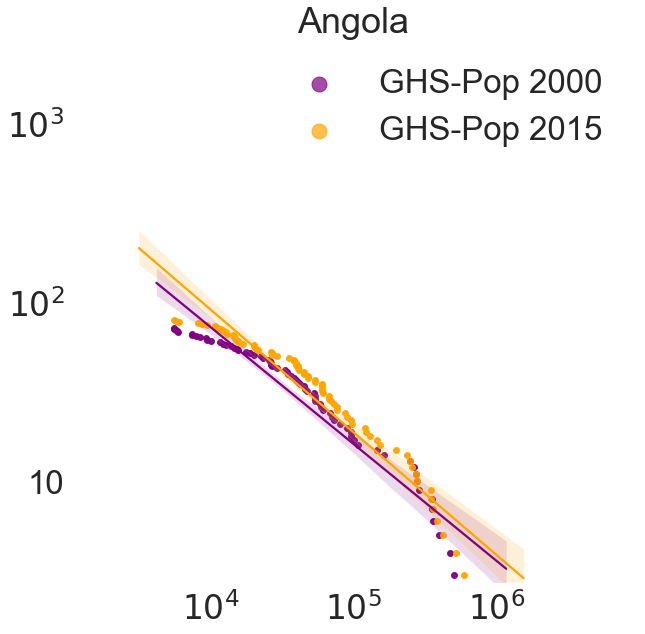

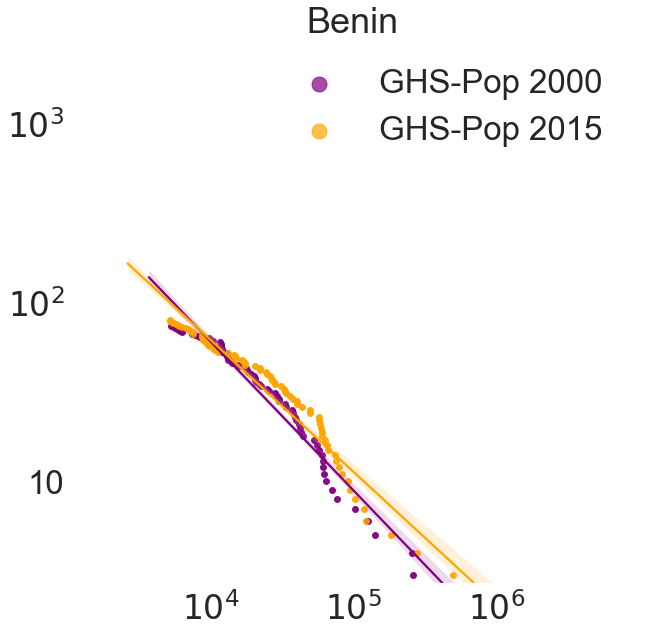

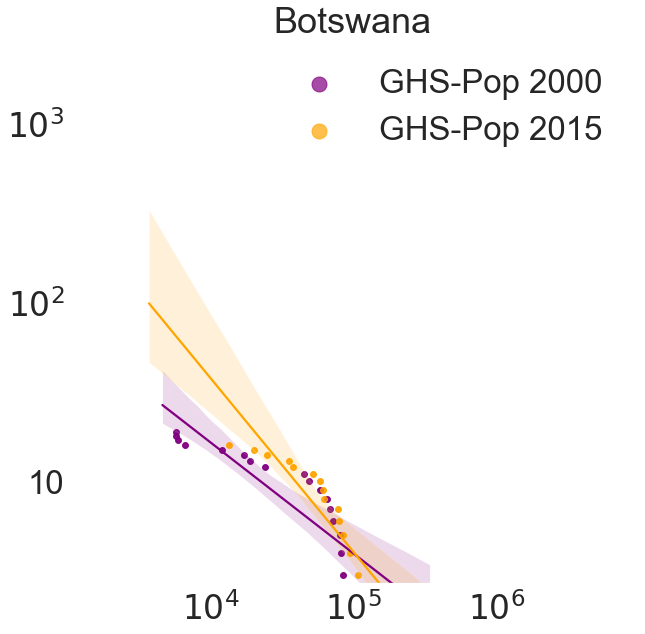

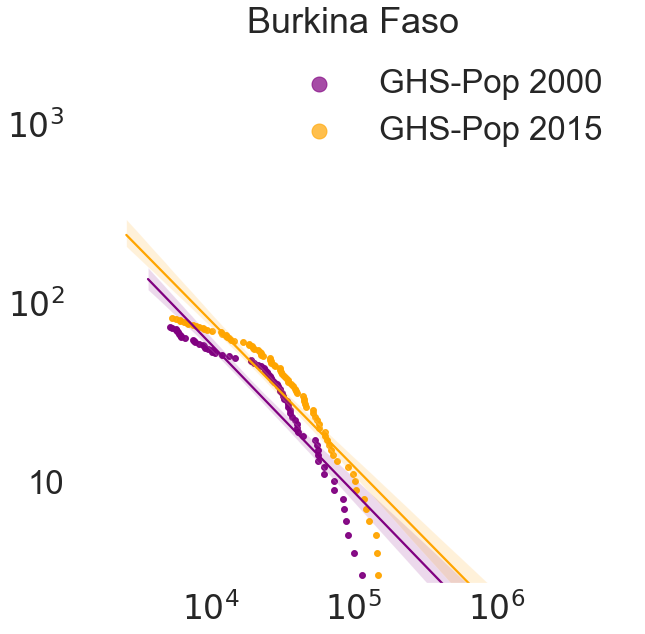

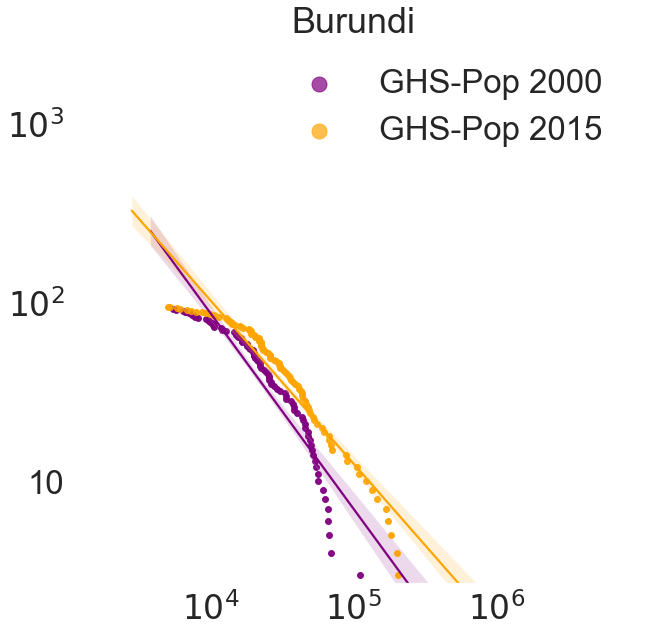

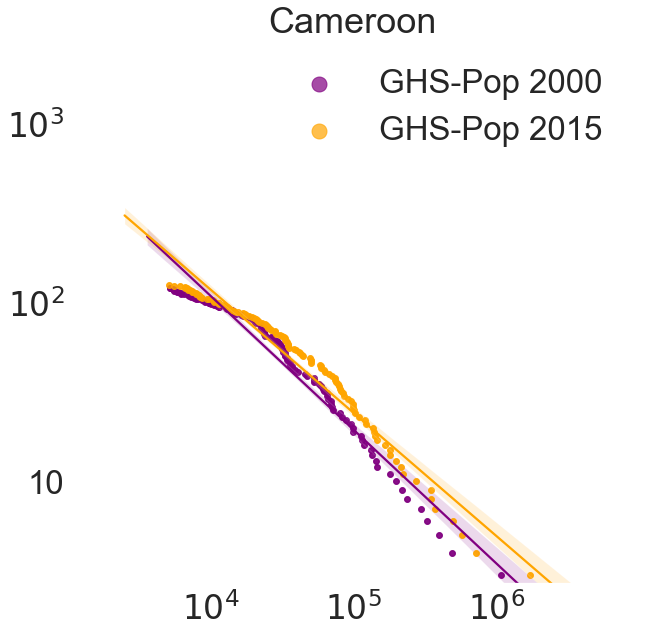

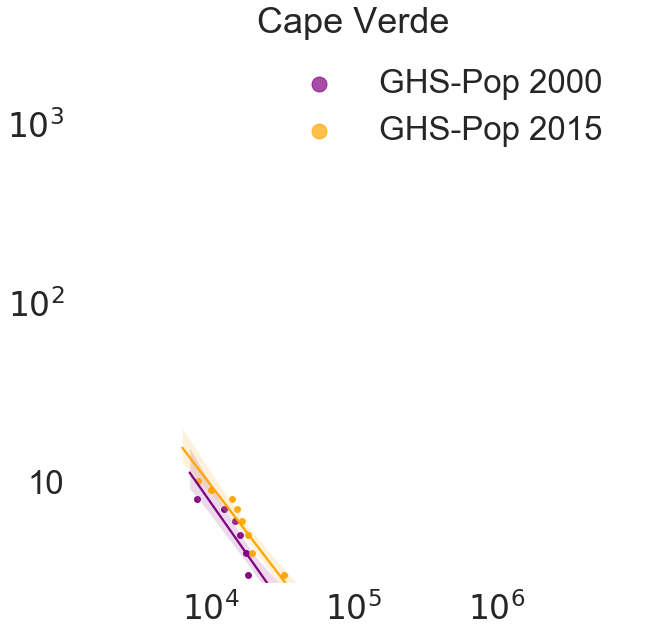

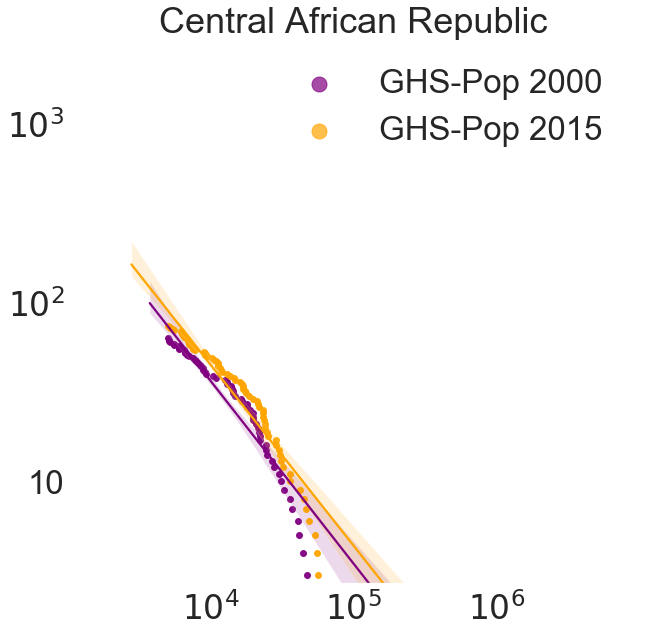

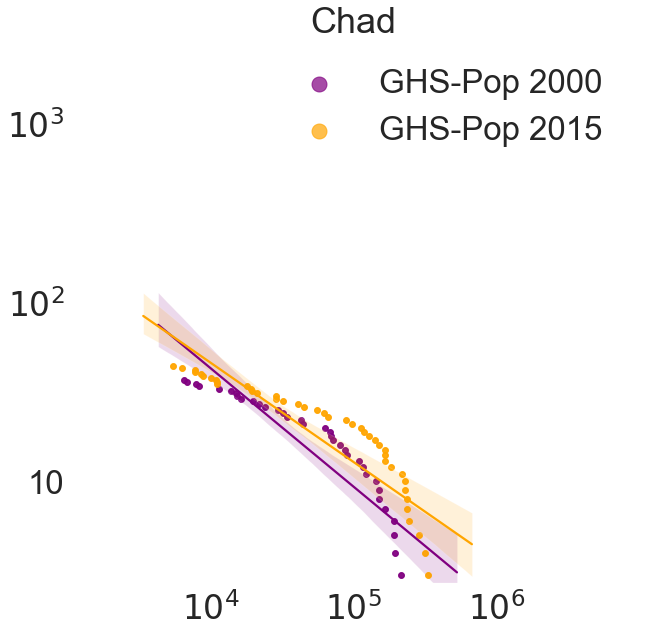

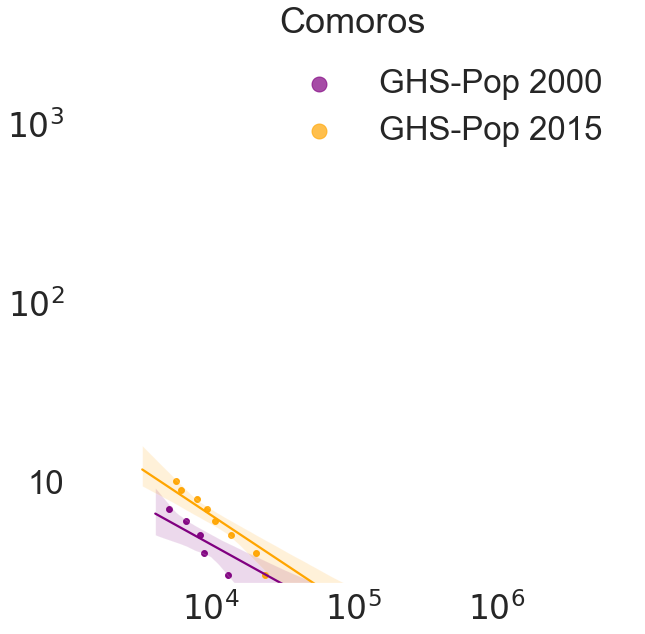

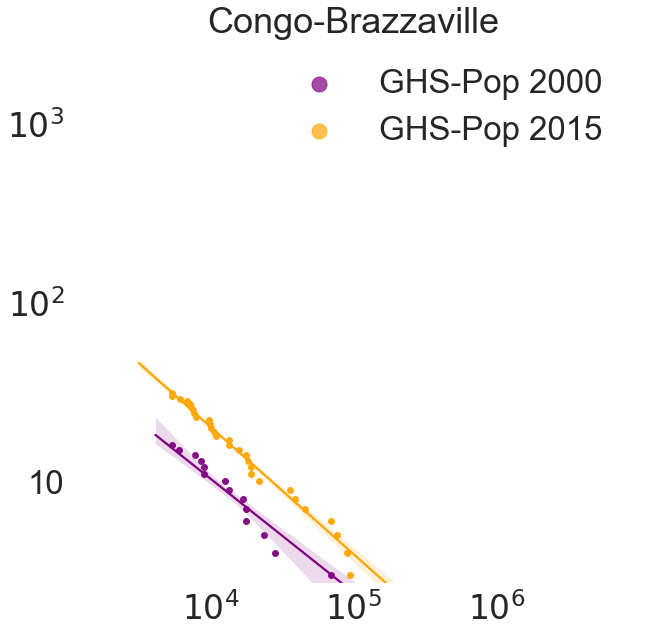

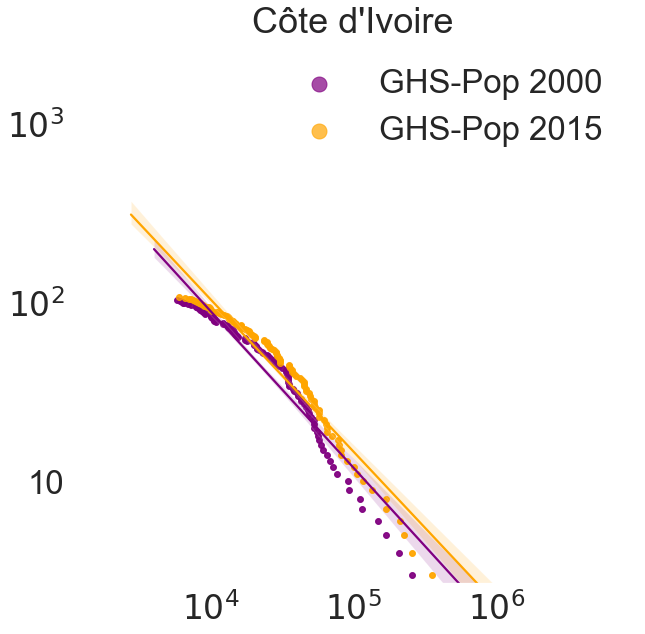

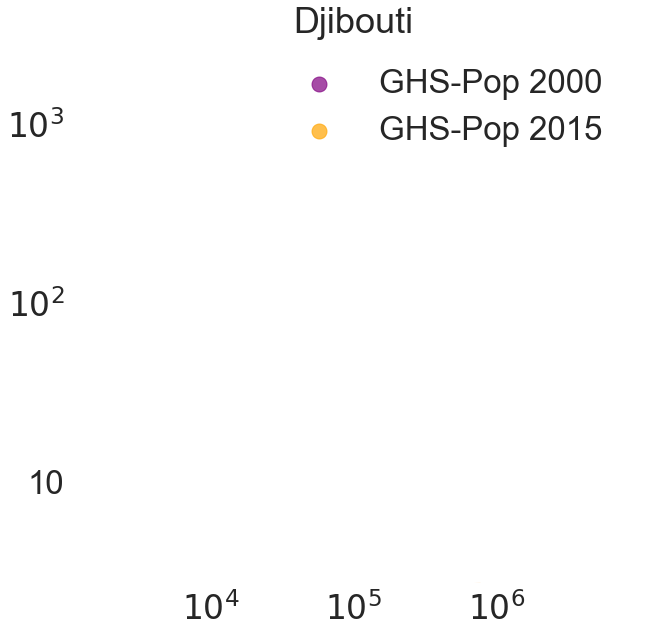

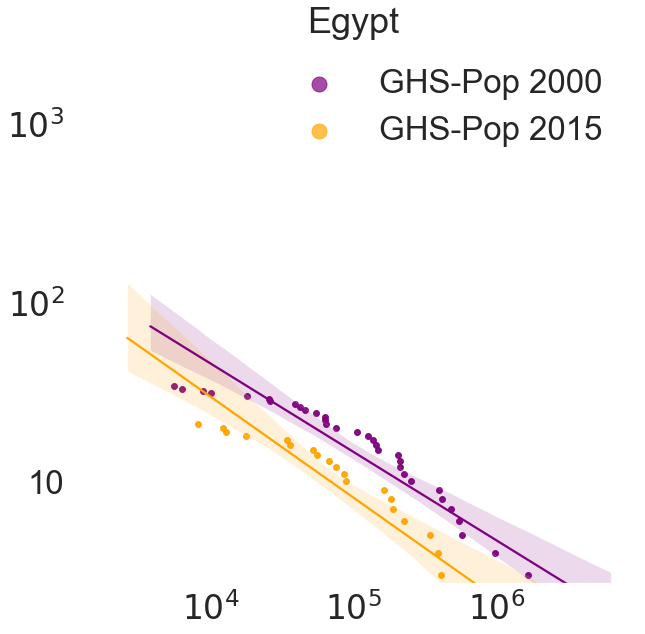

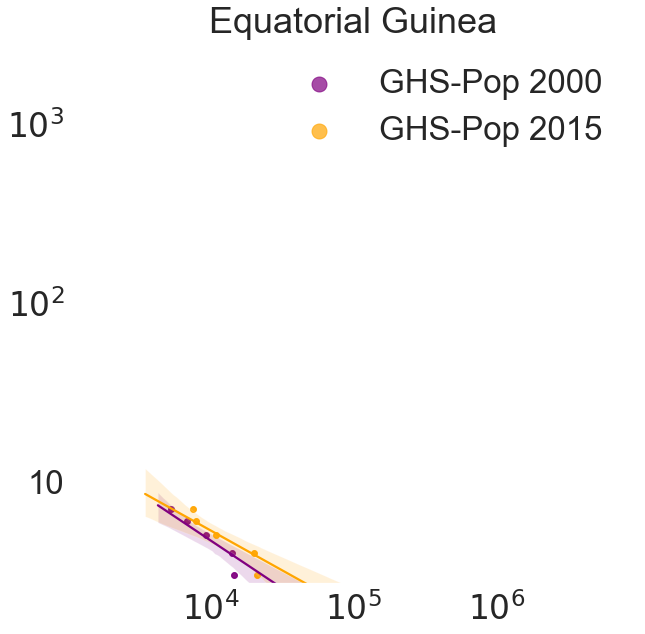

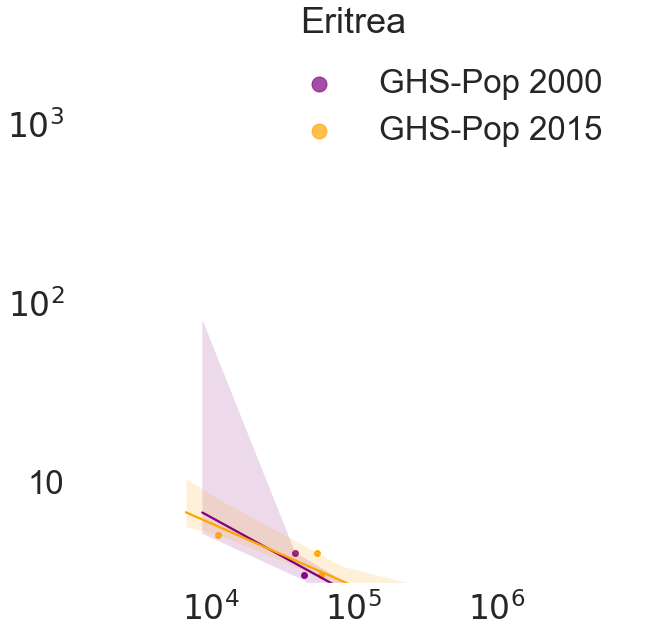

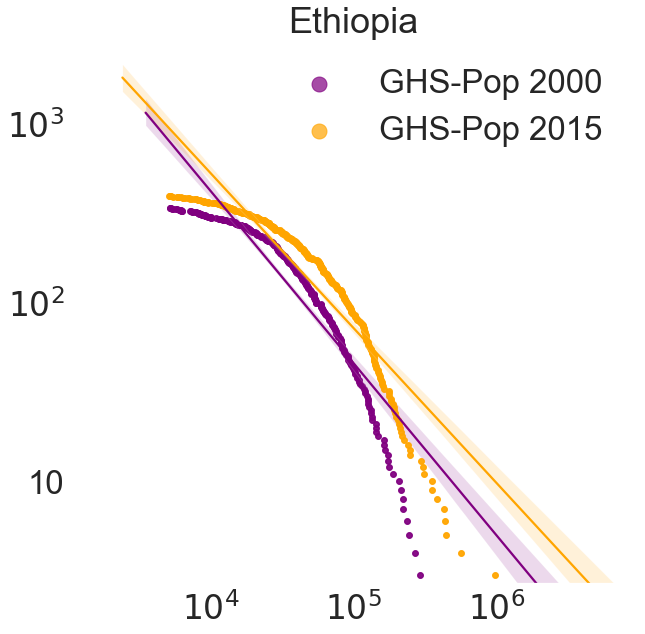

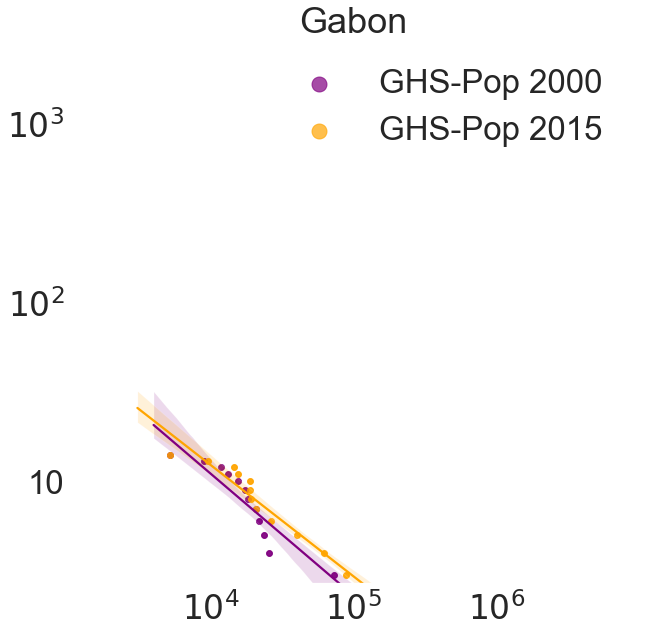

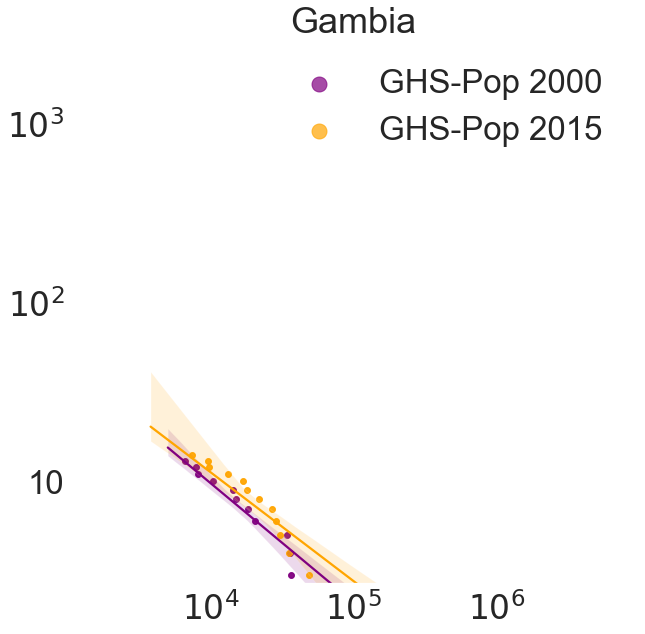

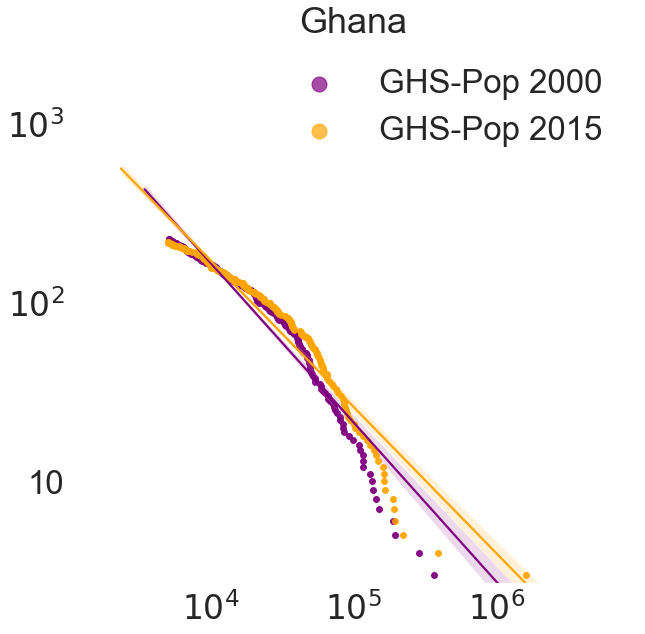

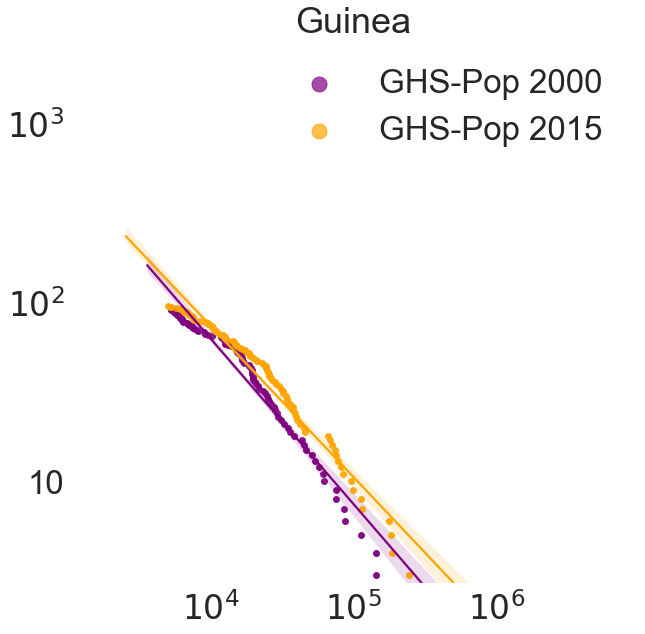

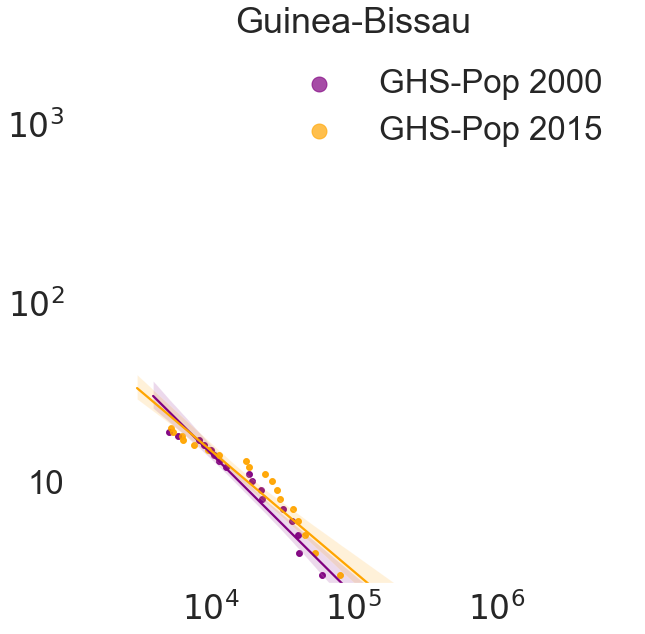

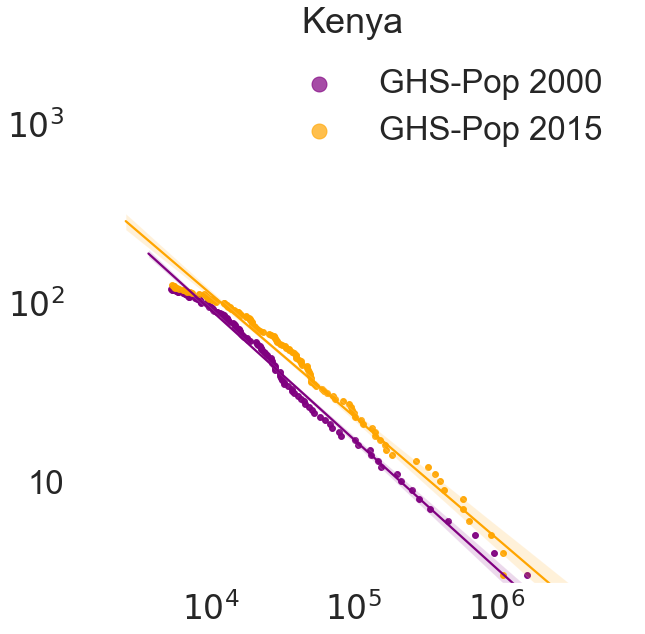

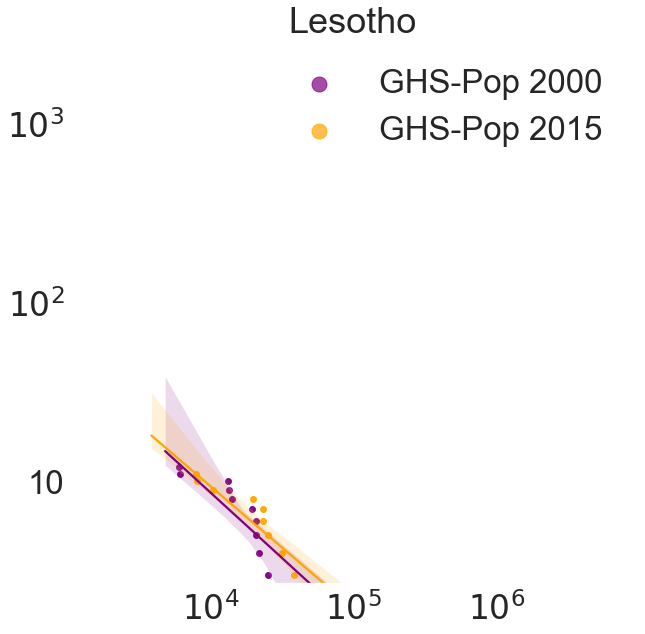

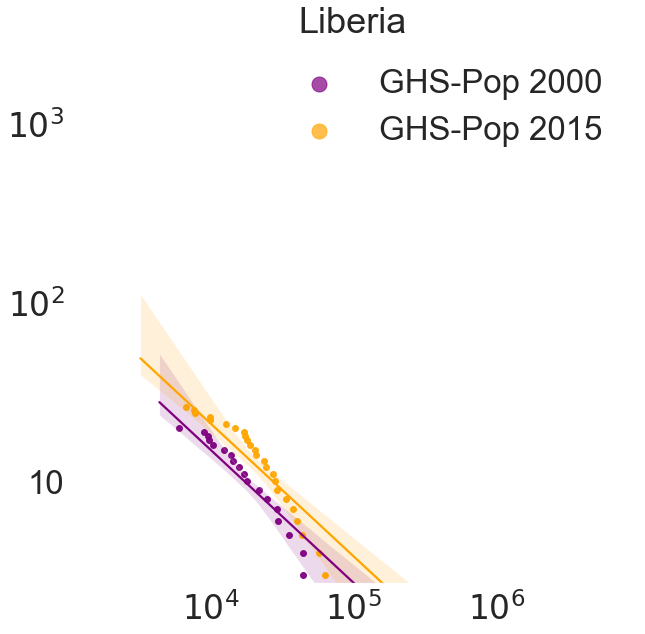

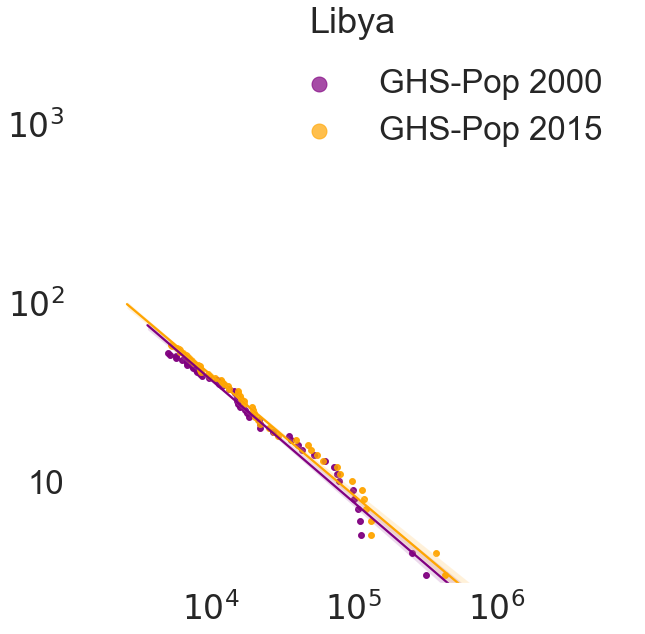

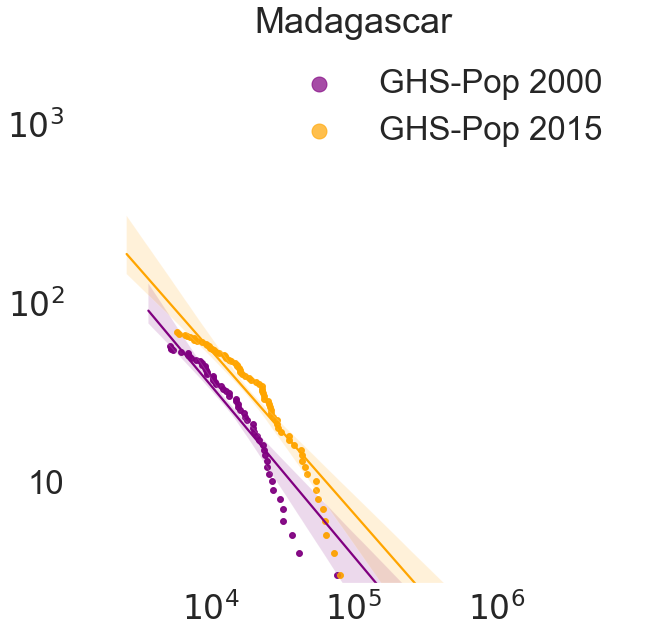

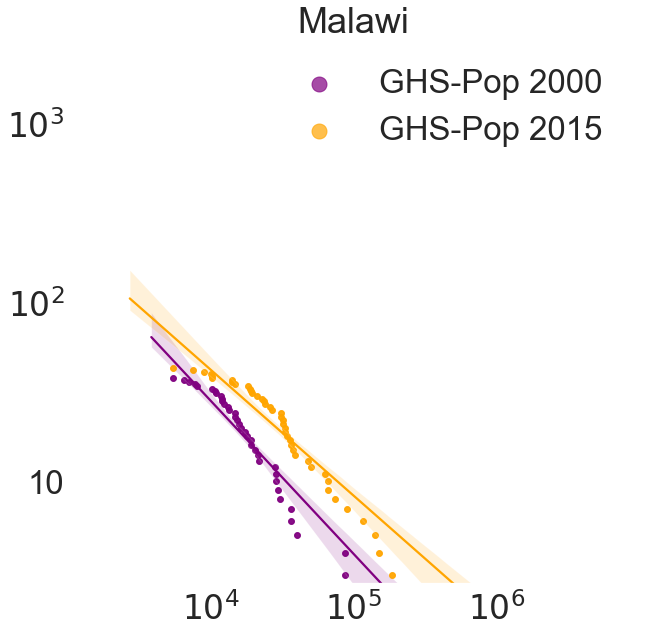

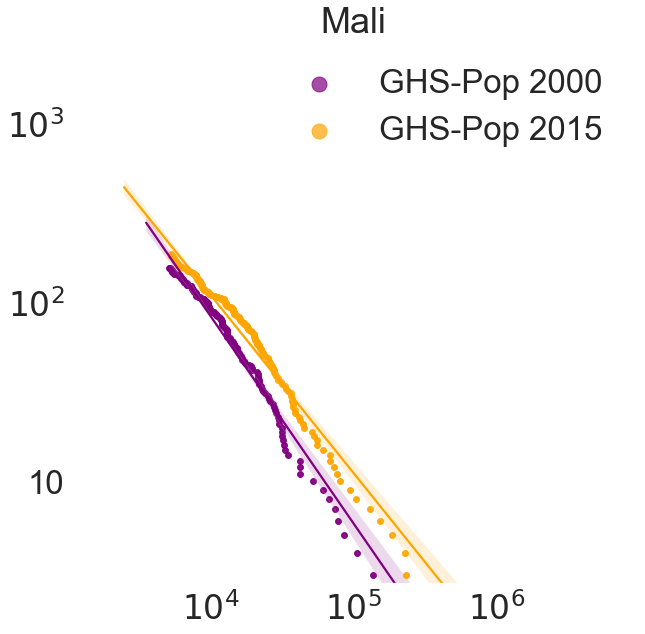

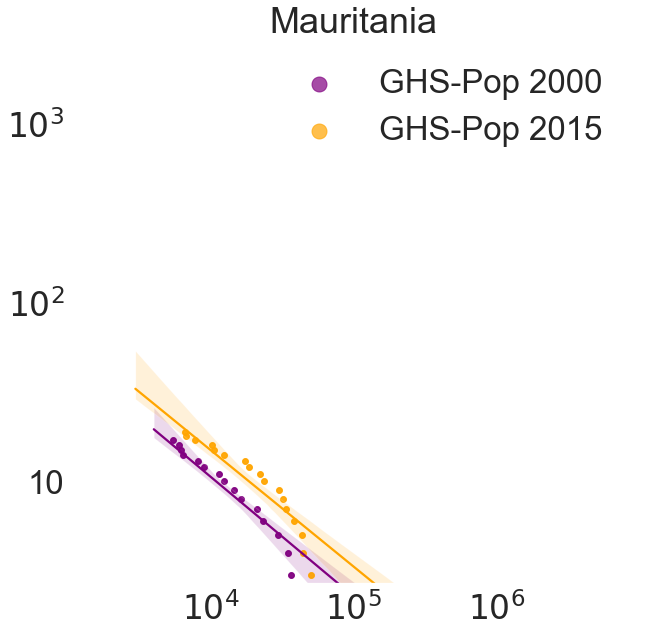

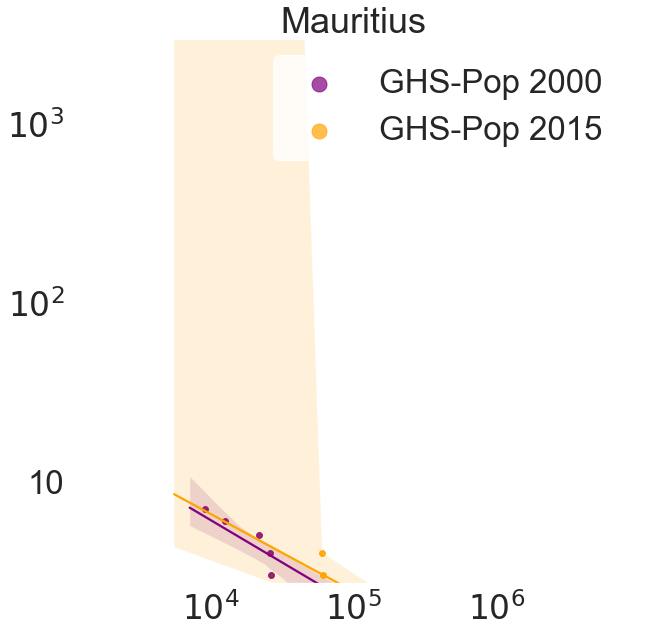

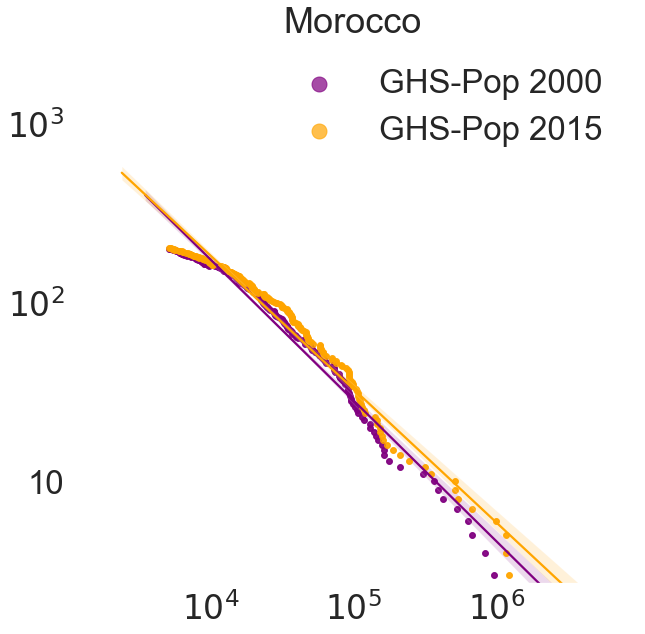

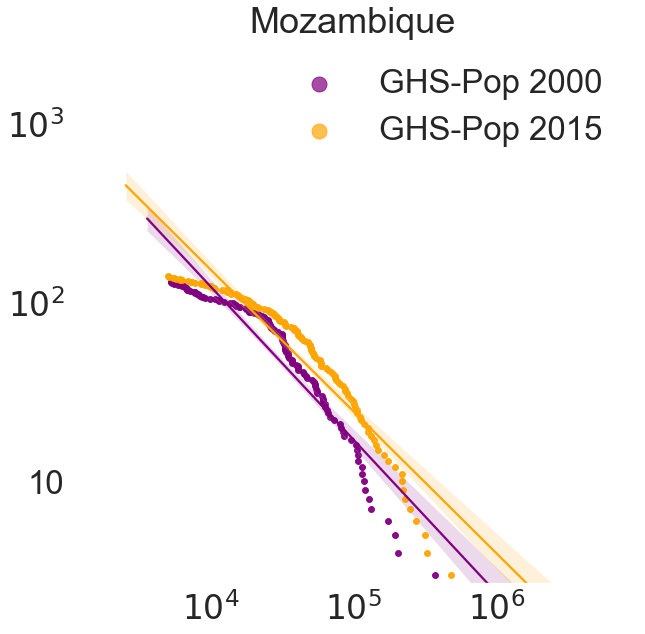

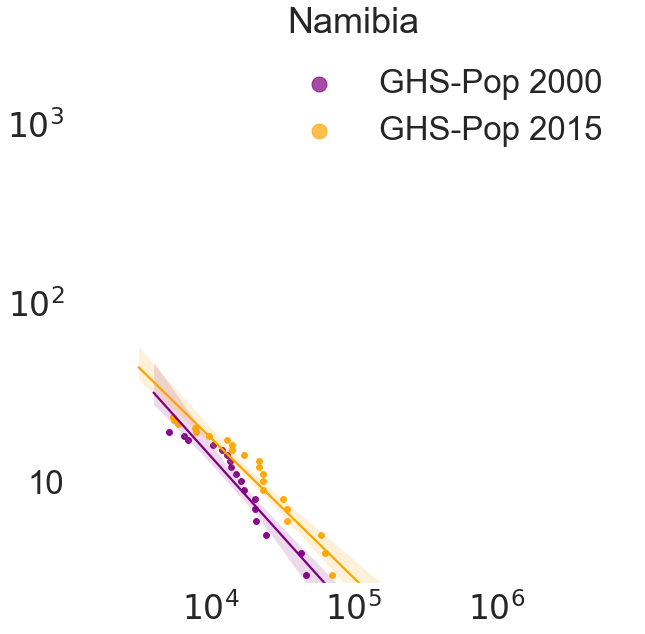

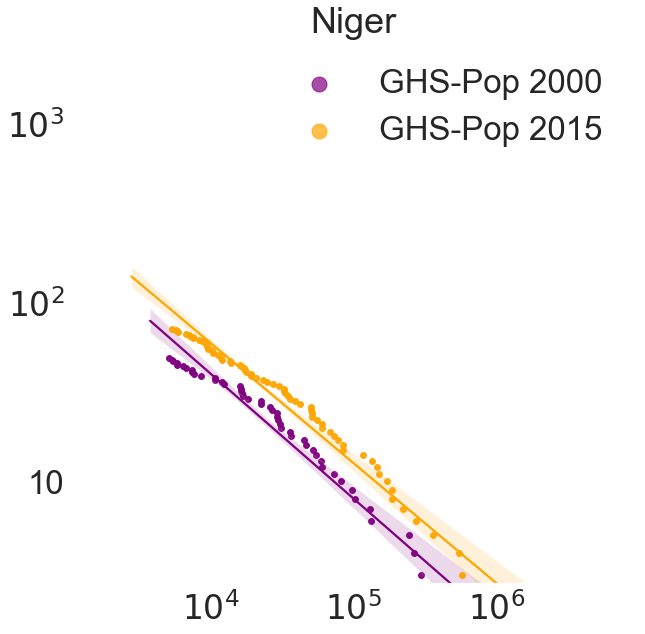

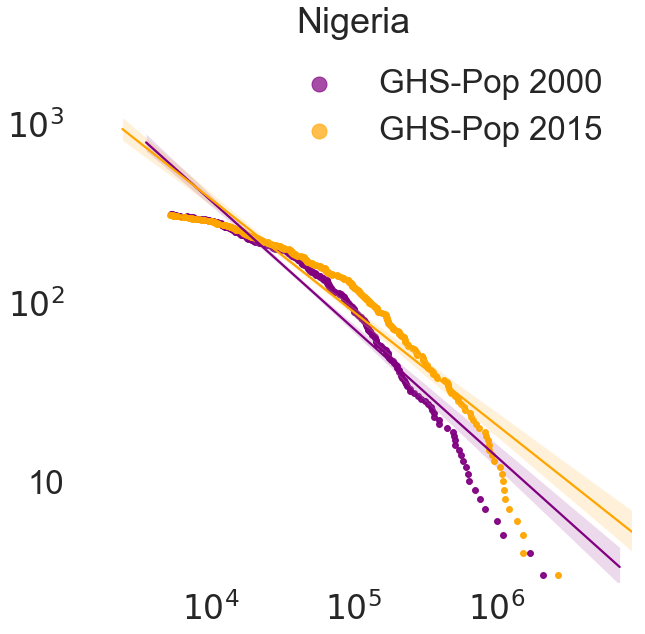

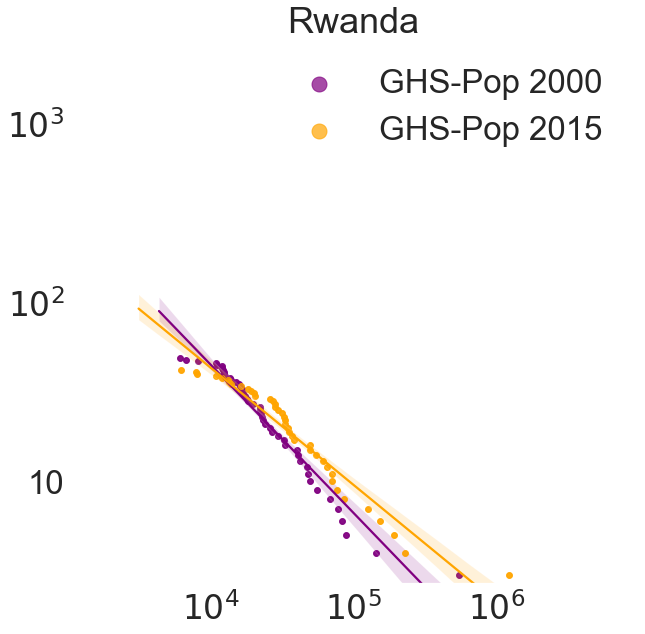

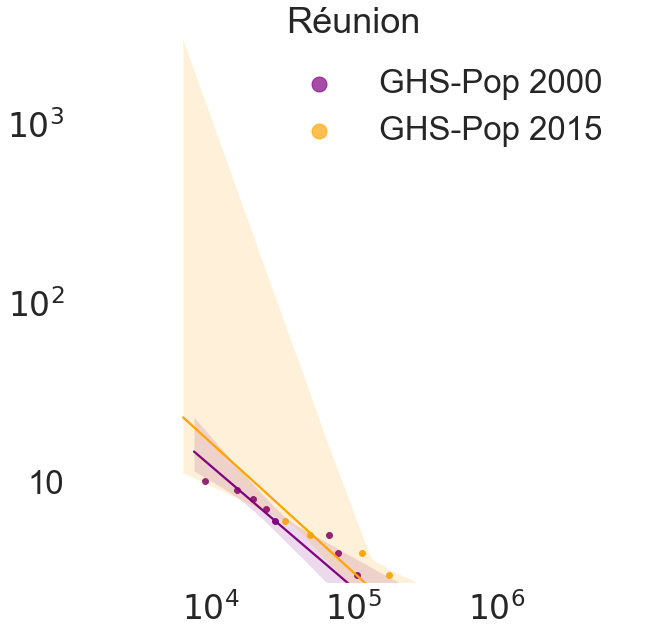

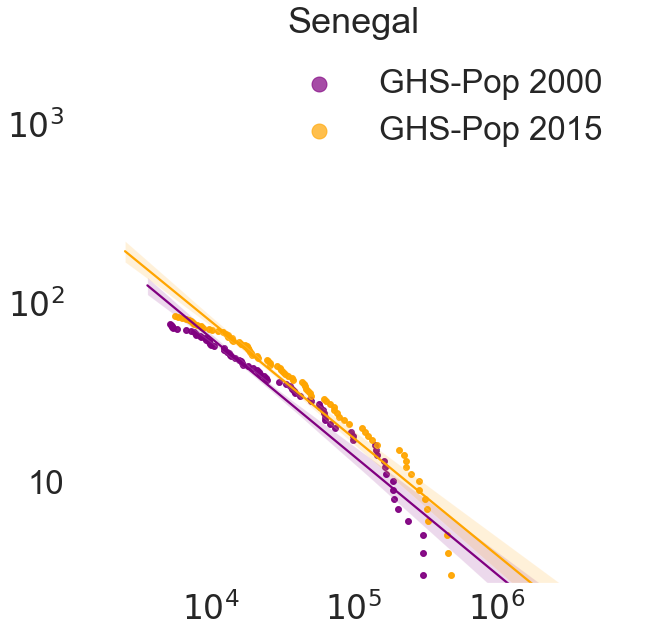

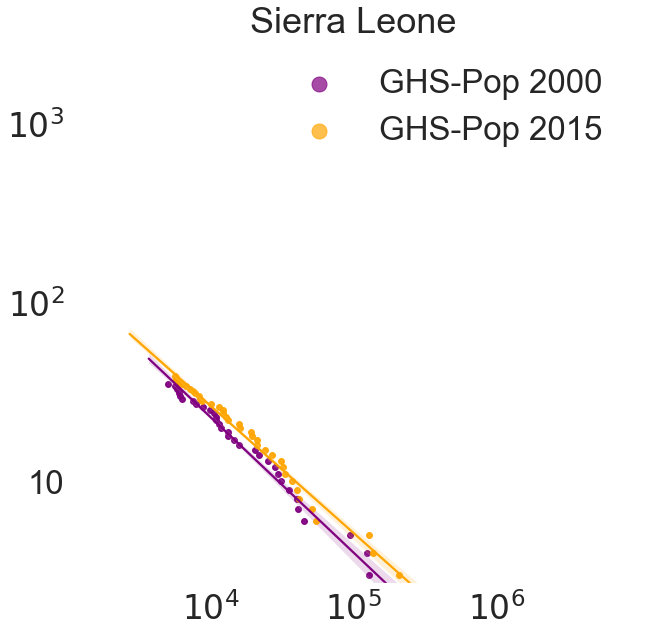

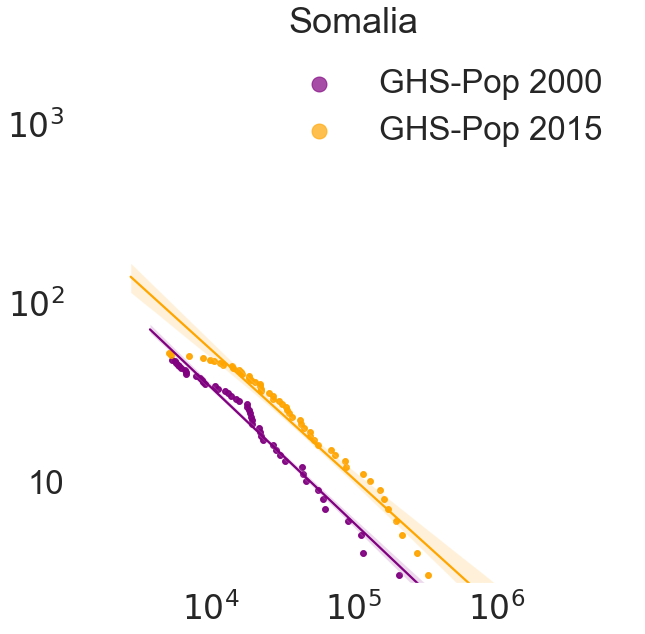

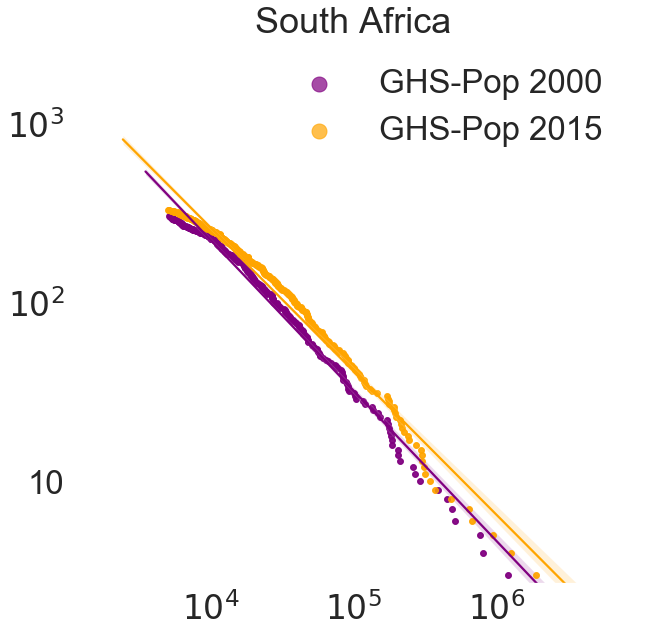

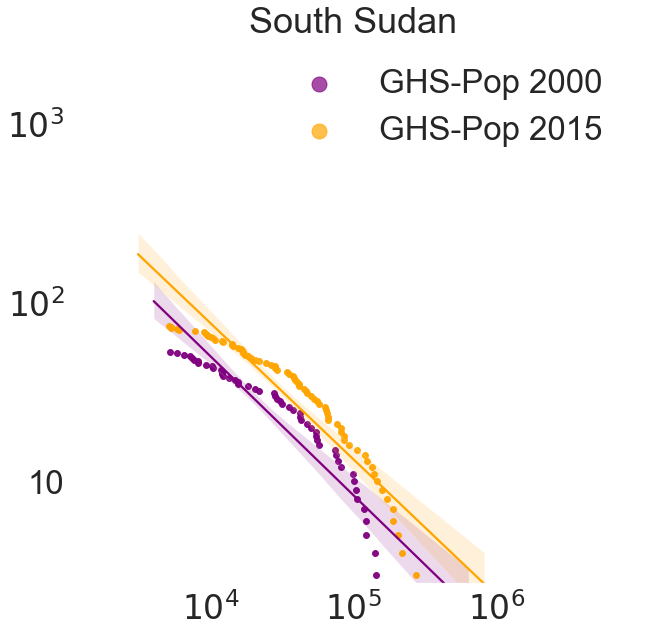

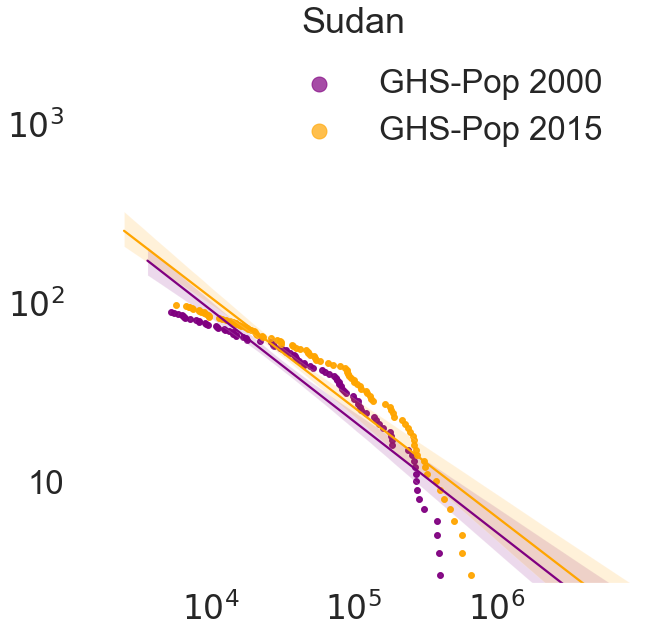

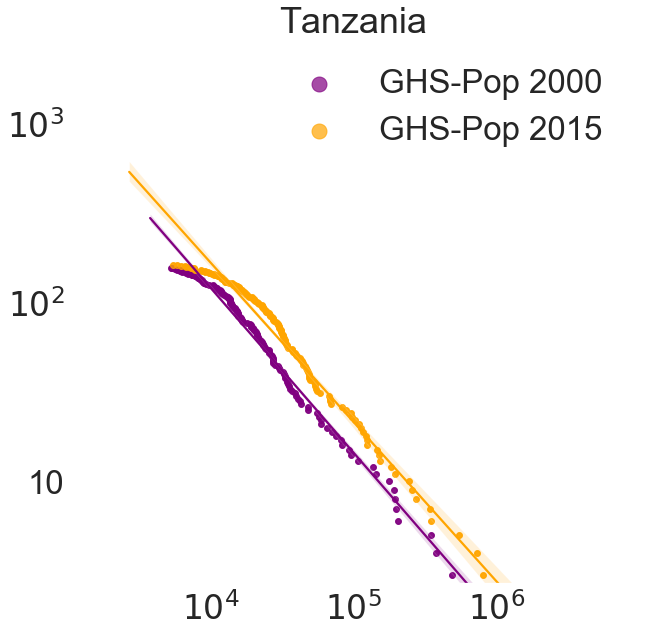

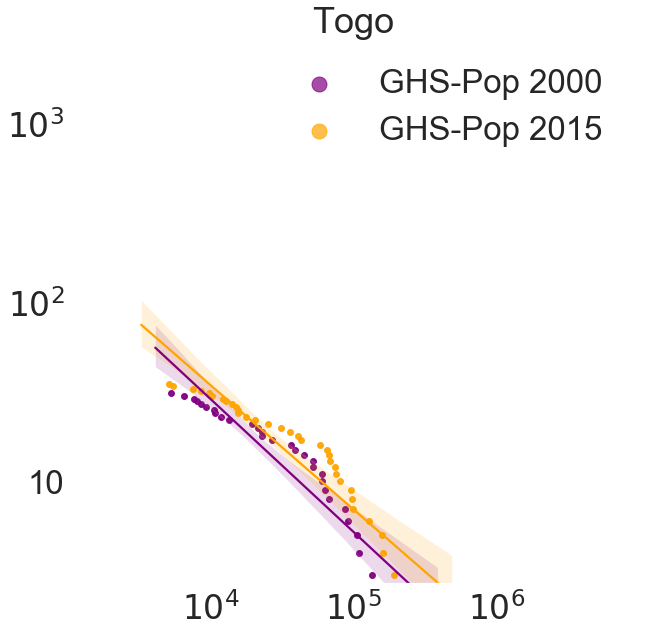

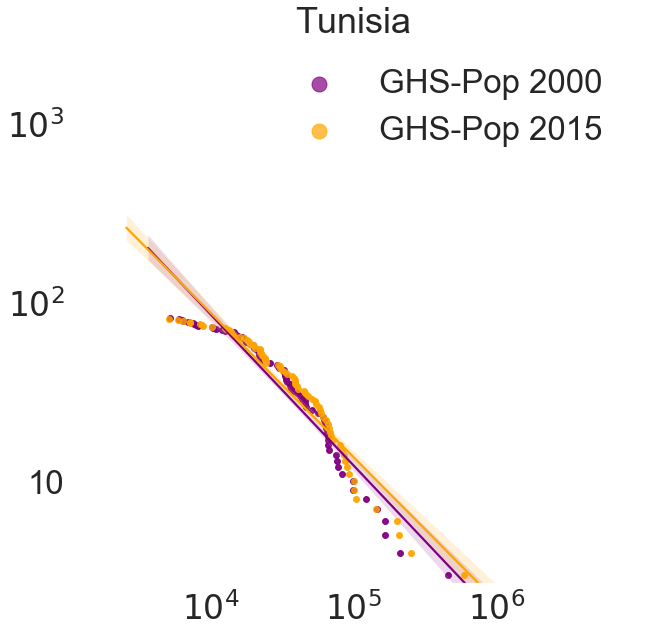

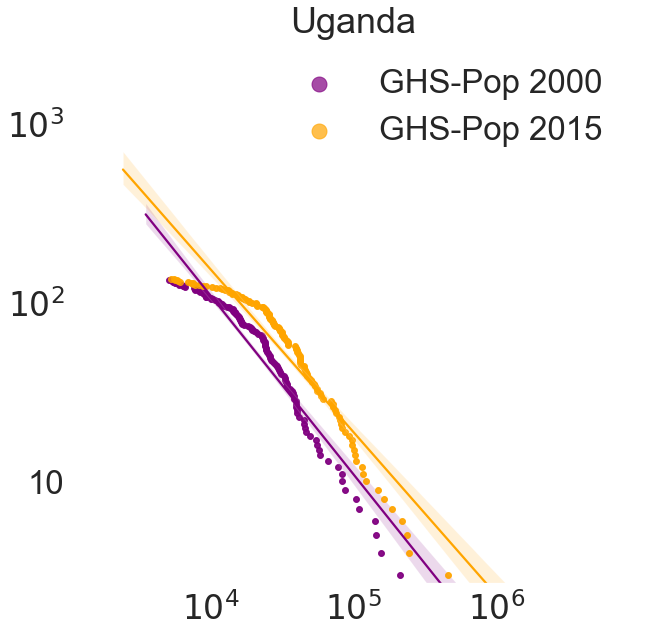

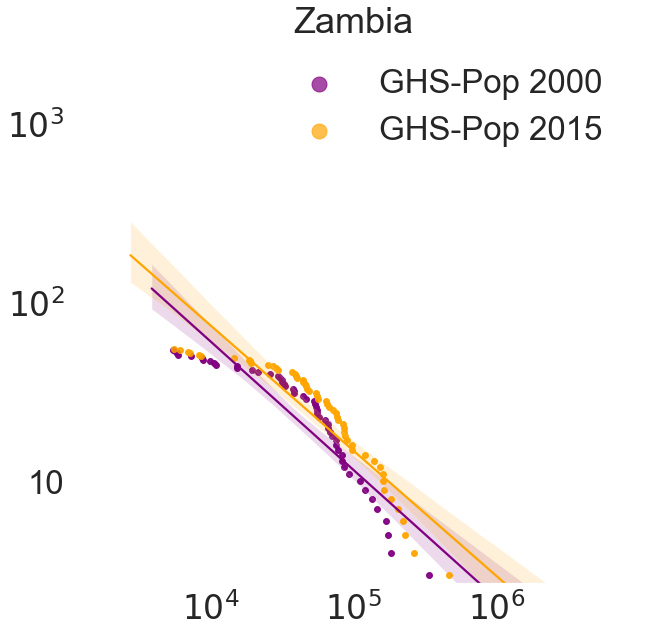

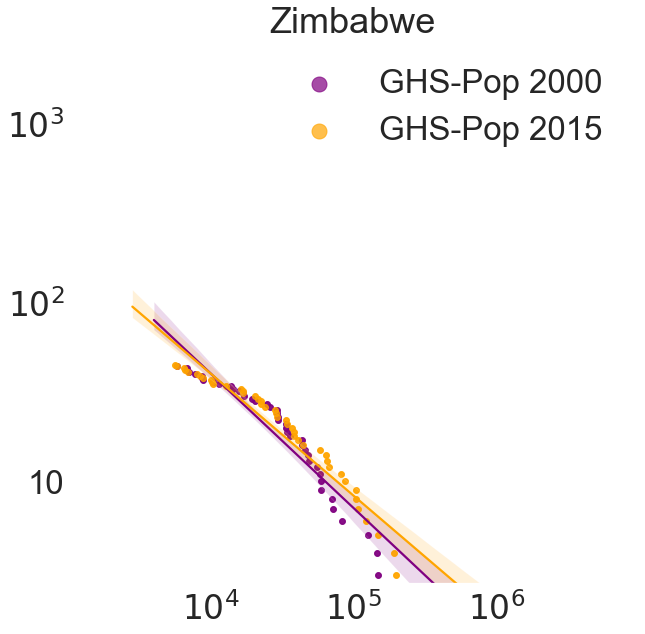

In [44]:
## Descriptives and Zipfs Plots for all countries

data1 = GHS2000[GHS2000.PopTot < 5*10**6]
data2 = GHS2015[GHS2015.PopTot < 5*10**6]


# all countires

df = pd.DataFrame()

arr = []


for country in countries: 
    
    test1 = data1[data1['country'] == country]
    test2 = data2[data2['country'] == country]
    
    # counts
    num2000= test1.PopTot.count()
    num2015= test2.PopTot.count()
    
    #Median
    m2000= test1.PopTot.median()
    m2015= test2.PopTot.median()
    
    #gini
 
    g2000 = gini(test1.PopTot)
    g2015 = gini(test2.PopTot)

    #zipf
    X1_zipf = np.sort(test1.PopTot) #sort the values
    Y1_zipf = list(range(1, len(X1_zipf)+1)) # make a range
    Y1_zipf = Y1_zipf[::-1] # Re order range

    X1_zipf_log = np.log(X1_zipf)
    Y1_zipf_log = np.log(Y1_zipf)

    X2_zipf = np.sort(test2.PopTot)
    Y2_zipf = list(range(1, len(X2_zipf)+1))
    Y2_zipf = Y2_zipf[::-1]

    X2_zipf_log = np.log(X2_zipf)
    Y2_zipf_log = np.log(Y2_zipf)
    
    fit1 = ss.linregress(X1_zipf_log, Y1_zipf_log)
    fit2 = ss.linregress(X2_zipf_log, Y2_zipf_log)

    #Fit

    s2000 = fit1[0] # Slope 2000
    p2000 = fit1[4] # p val 2000
    
    s2015 = fit2[0] # Slope 2015
    p2015 = fit2[4] # p val 2015
    
    # Make dataframe
    df[country] = (num2000, num2015, m2000, m2015, g2000, g2015, s2000, p2000, s2015, p2015)

    # Zipf's law

    ## Size & number
    sns.set(font_scale=3)
    fig, ax1 = plt.subplots(nrows=1, ncols=1,  figsize=(10, 10))

    # Plot
    plt.scatter(X1_zipf_log, Y1_zipf_log , marker='.', color='purple', s=100, alpha = 0.7)
    plt.scatter(X2_zipf_log, Y2_zipf_log , marker='.', color='orange', s=100, alpha = 0.7)

    # Legend
    leg = ['GHS-Pop 2000', 'GHS-Pop 2015']
    plt.legend(leg,loc=1, markerscale=3, facecolor = 'white', edgecolor = 'white')

    # Fit Lines
    sns.regplot(X1_zipf_log, Y1_zipf_log, color = 'purple')
    sns.regplot(X2_zipf_log, Y2_zipf_log, color = 'orange')

    # Title
    plt.title(country)

    # Labels
    plt.xlabel('')
    plt.ylabel('')

    # Set Ticks
    plt.xticks([np.log(10**4), np.log(10**5), np.log(10**6), np.log(10**7)], 
               ['$10^4$', '$10^5$', '$10^6$', '$10^7$'])

    plt.yticks([np.log(10), np.log(100), np.log(1000), np.log(10000),  np.log(100000)], 
               ['10', '$10^2$', '$10^3$', '$10^4$', '$10^5$'])

    # Set Background Color
    ax1.set_facecolor('White')

    axes = plt.gca()
    axes.set_xlim([7,16])
    #axes.set_xlim([min(X2_zipf_log), max(X2_zipf_log)])
    axes.set_ylim([1,8])

    ## Save Zipfs
    fig.savefig('/Users/cascade/Desktop/'+country+'_Zipf.png', dpi=300)
    

In [26]:
df

Algeria        Angola         Benin      Botswana  Burkina Faso  \
0    428.000000     72.000000     74.000000     19.000000     73.000000   
1    402.000000     80.000000     80.000000     16.000000     82.000000   
2  19880.773773  40094.780350  20299.958603  48727.512146  26733.035400   
3  26383.854614  44901.230728  24400.032341  61391.567421  30689.093048   
4      0.645905      0.644777      0.688156      0.454059      0.623311   
5      0.593291      0.639189      0.747768      0.372562      0.709987   
6     -1.007721     -0.652603     -0.831722     -0.620203     -0.825689   
7      0.009022      0.027165      0.017264      0.088313      0.034433   
8     -0.940632     -0.685146     -0.736565     -0.970727     -0.812056   
9      0.012226      0.025515      0.018208      0.114641      0.028962   

        Burundi      Cameroon    Cape Verde  Central African Republic  \
0     92.000000    121.000000      8.000000                 63.000000   
1     95.000000    125.000000     10.000000                 74.000000   
2  21663.211548  28971.001587  16800.102066              14224.431641   
3  27549.740204  32755.354645  17383.246246              14653.702713   
4      0.475626      0.724136      0.324729                  0.611329   
5      0.604948      0.774973      0.370536                  0.635196   
6     -1.091653     -0.747557     -1.137710                 -1.020556   
7      0.038985      0.014973      0.109648                  0.043797   
8     -0.910685     -0.688388     -1.047199                 -1.010752   
9      0.024157      0.012882      0.080346                  0.036985   

           Chad      ...            Somalia  South Africa   South Sudan  \
0     37.000000      ...          48.000000    304.000000     53.000000   
1     44.000000      ...          52.000000    330.000000     74.000000   
2  67816.092102      ...       18727.253983  17868.781616  31285.855103   
3  77108.969360      ...       32585.434326  20074.992813  38382.743515   
4      0.479576      ...           0.724667      0.743615      0.516798   
5      0.522907      ...           0.687298      0.757637      0.556405   
6     -0.661523      ...          -0.757390     -0.840382     -0.775759   
7      0.064453      ...           0.013611      0.006071      0.045858   
8     -0.554535      ...          -0.723282     -0.802051     -0.760212   
9      0.051897      ...           0.020534      0.006496      0.035319   

          Sudan      Tanzania          Togo       Tunisia        Uganda  \
0     88.000000    156.000000     31.000000     82.000000    133.000000   
1     97.000000    163.000000     35.000000     81.000000    136.000000   
2  47260.093597  16573.601624  36289.398987  32559.294785  21309.400391   
3  53719.275391  27087.511383  40469.644531  32827.711639  30961.794998   
4      0.711984      0.701920      0.497140      0.667474      0.637347   
5      0.615205      0.649450      0.527337      0.710857      0.670318   
6     -0.621191     -0.920618     -0.742015     -0.843815     -0.998703   
7      0.026885      0.008866      0.059536      0.024668      0.022096   
8     -0.613148     -0.890076     -0.694366     -0.806126     -0.909504   
9      0.028233      0.013438      0.052738      0.022593      0.024179   

         Zambia      Zimbabwe  
0     54.000000     44.000000  
1     55.000000     45.000000  
2  52955.204895  29509.240692  
3  63491.293030  28905.882538  
4      0.603552      0.732242  
5      0.651430      0.767029  
6     -0.717896     -0.751652  
7      0.041490      0.034927  
8     -0.699688     -0.682277  
9      0.039350      0.028595  

[10 rows x 51 columns]

In [27]:
# df.to_csv(data_temp+'ALLCOUNTRIES_TABLE2_ERL20190301.csv')

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


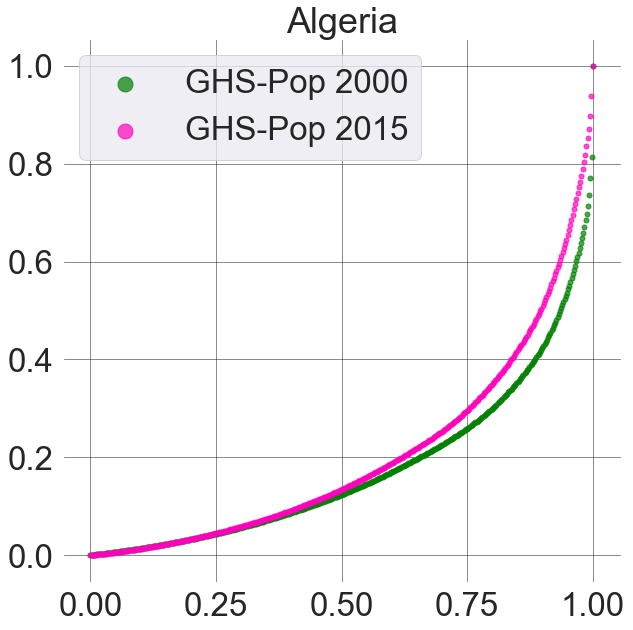

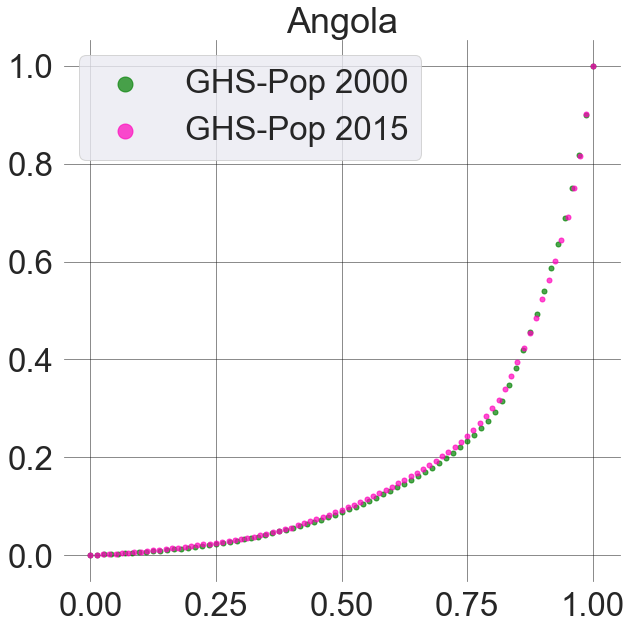

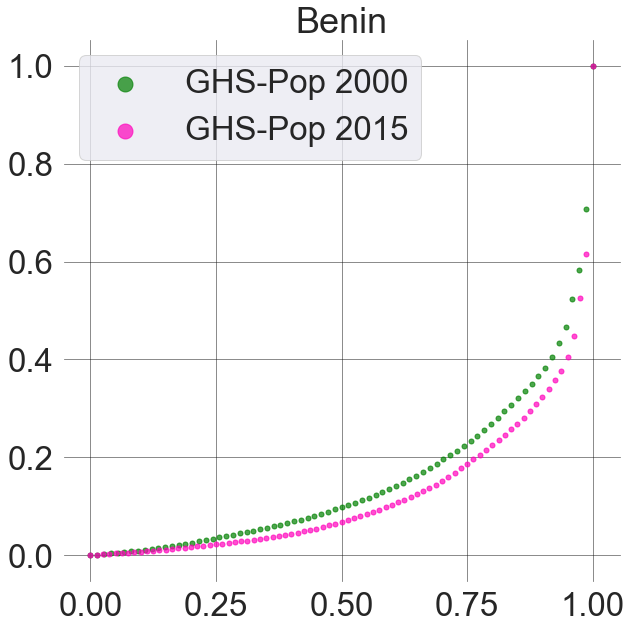

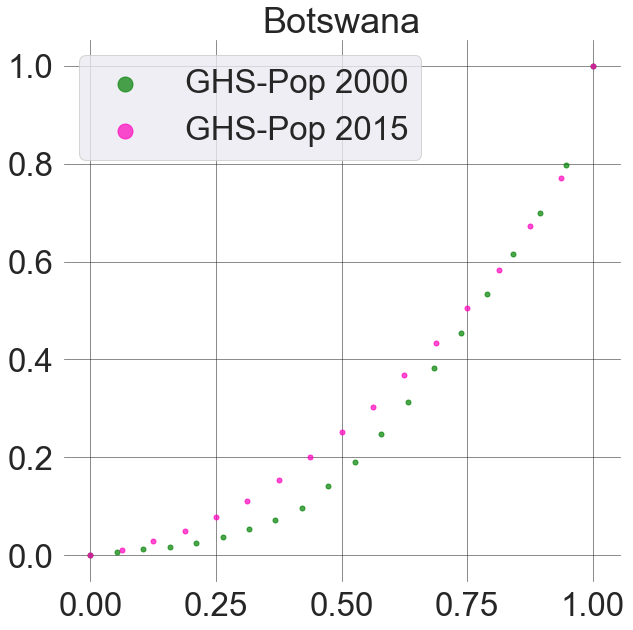

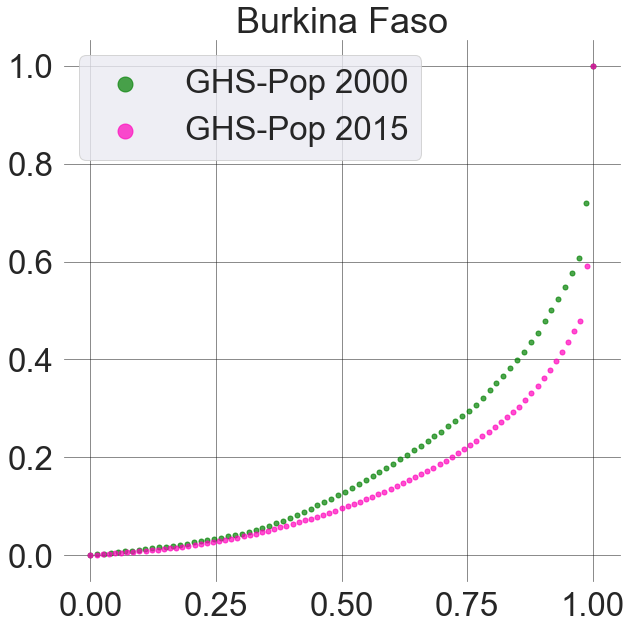

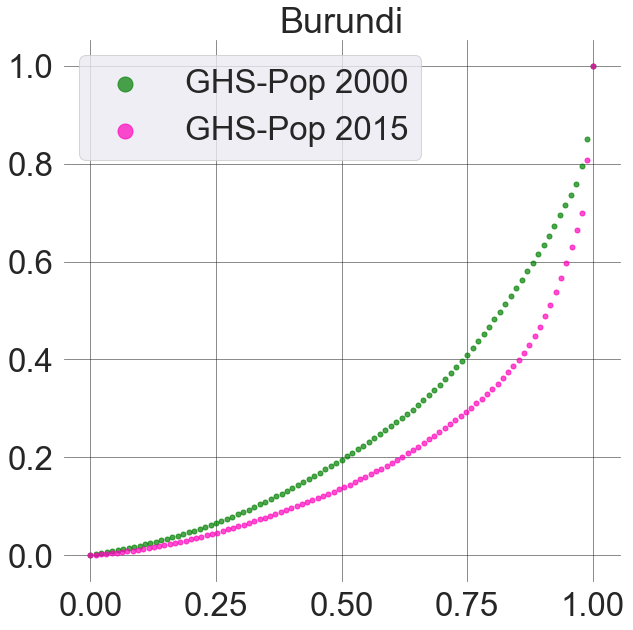

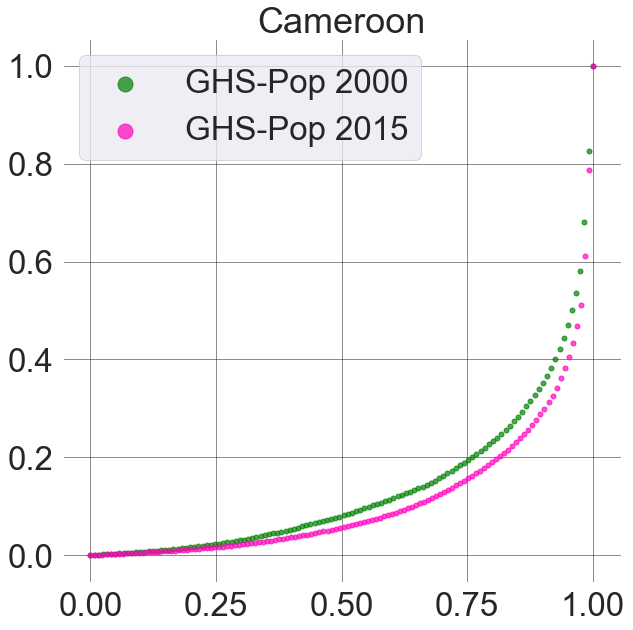

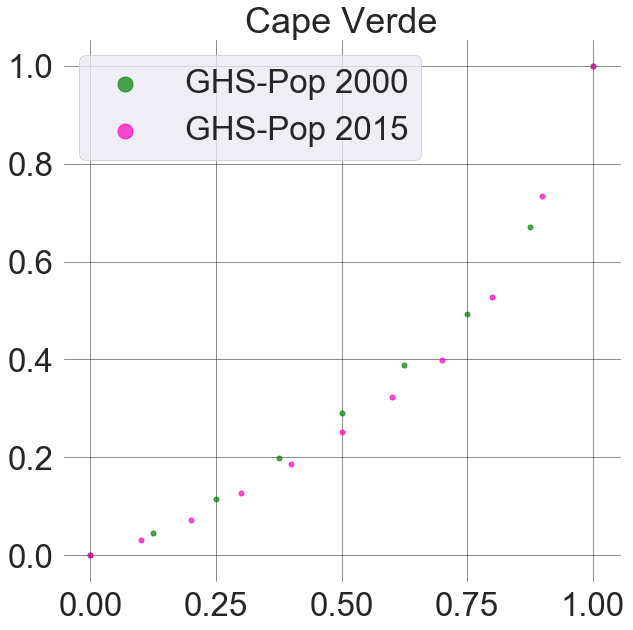

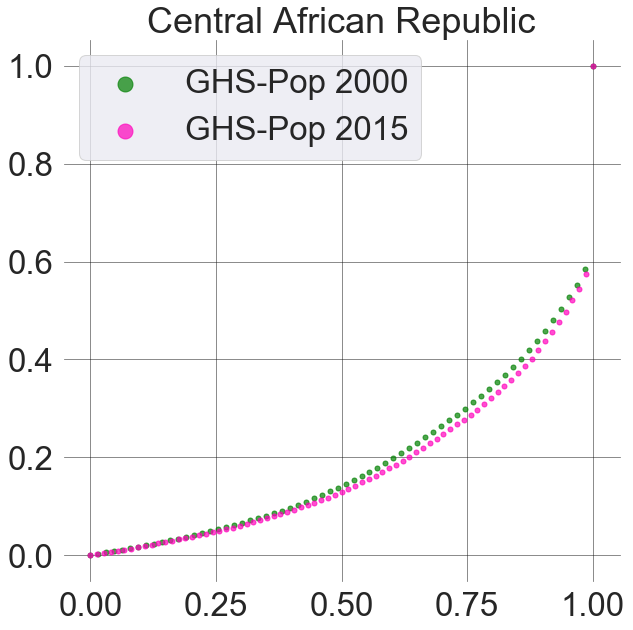

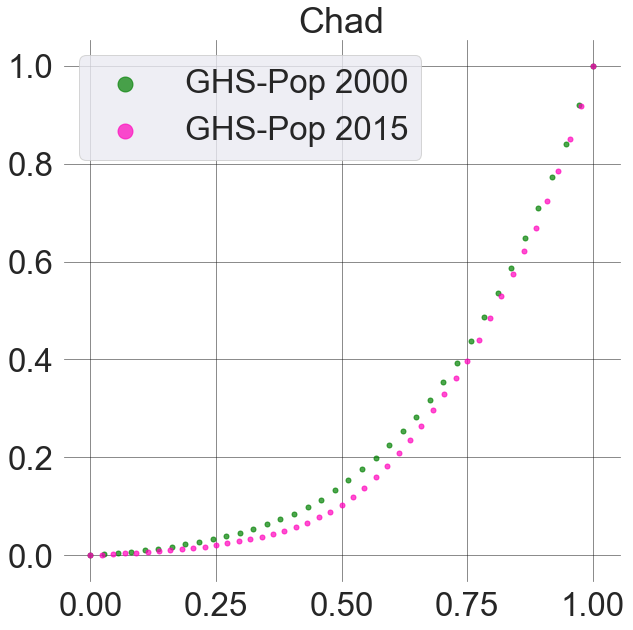

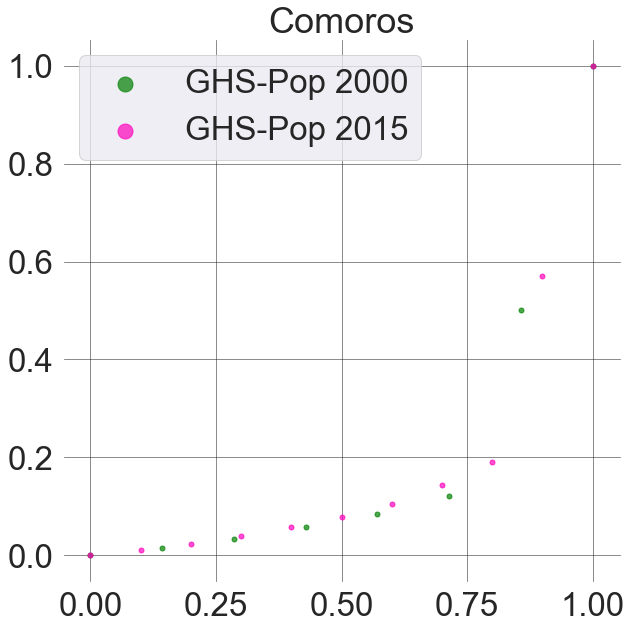

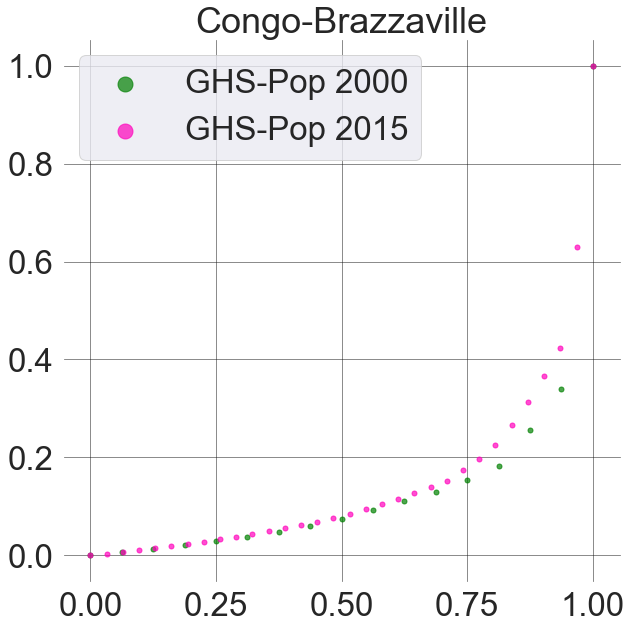

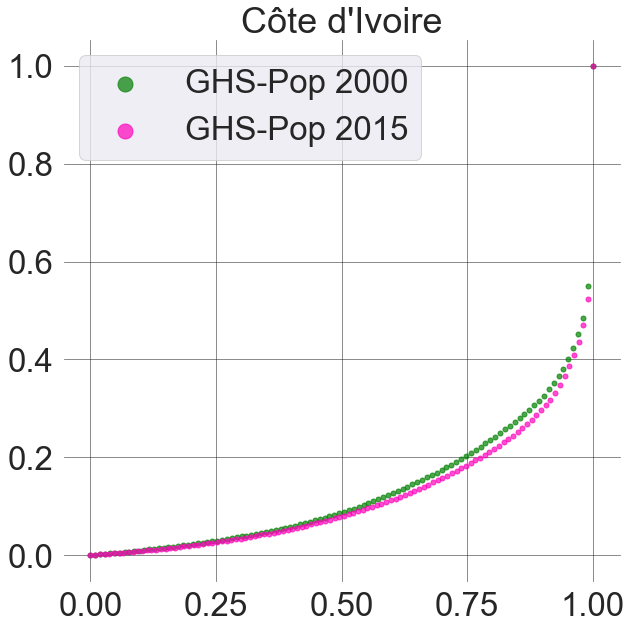

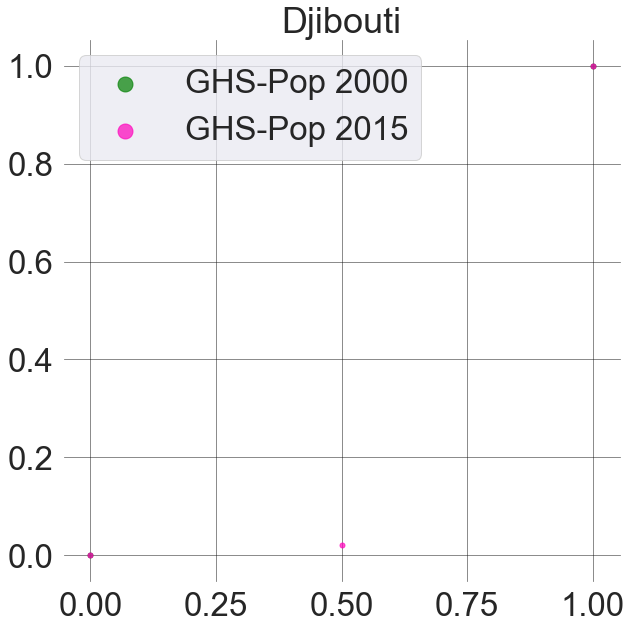

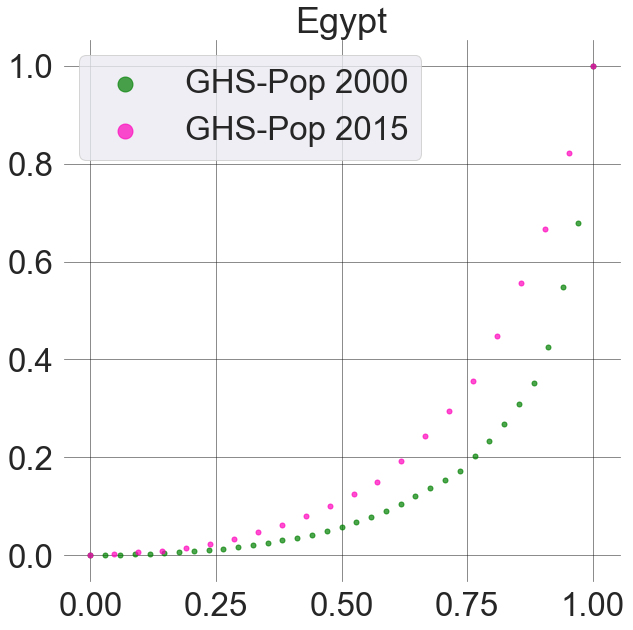

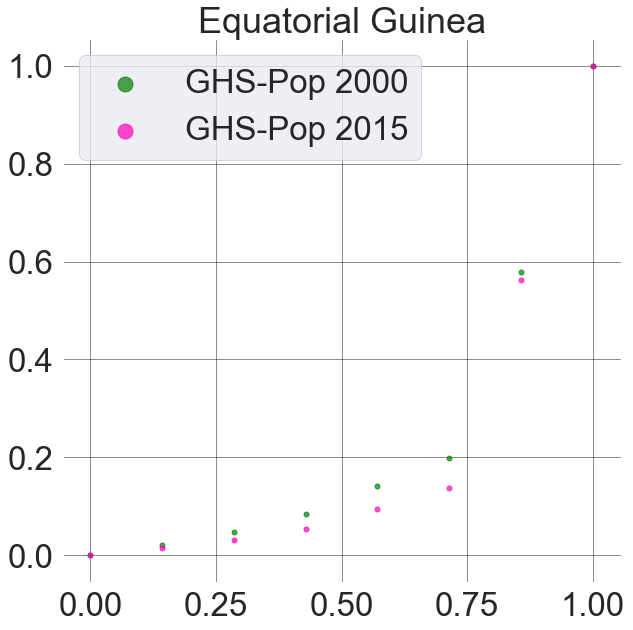

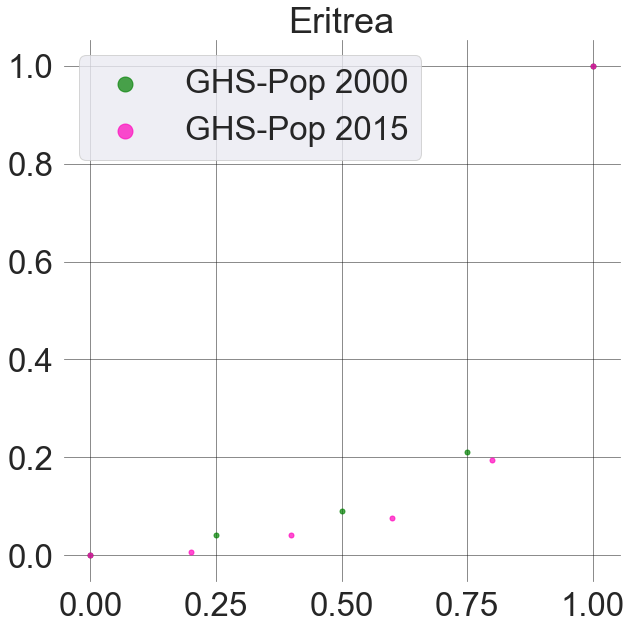

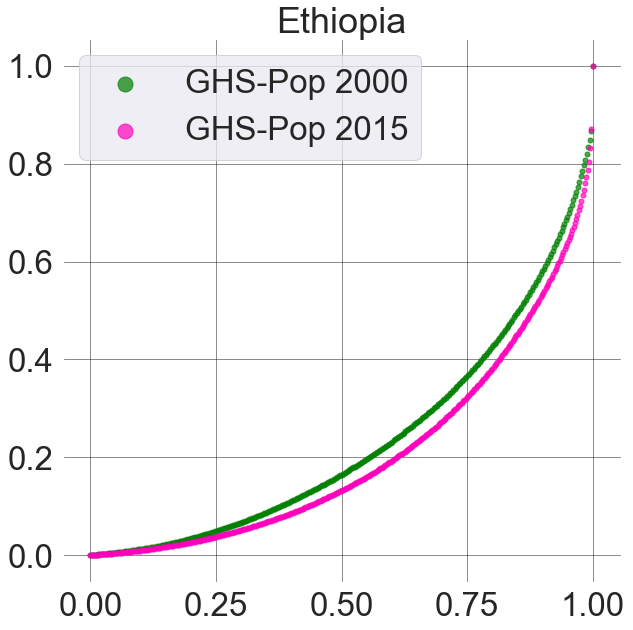

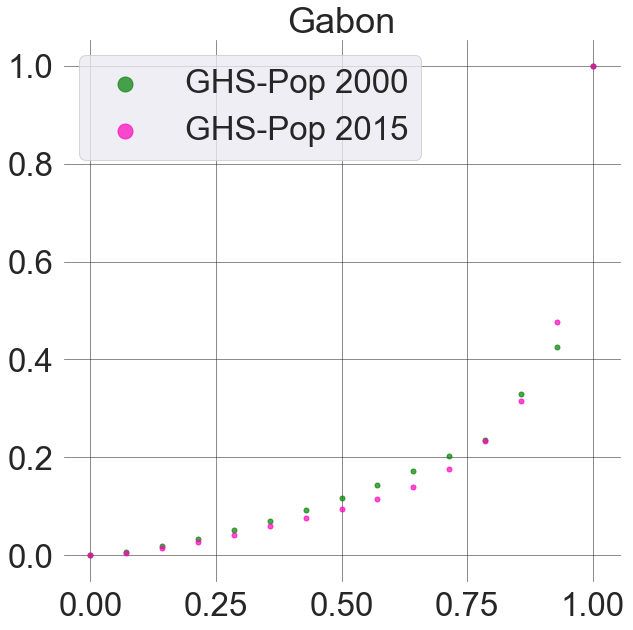

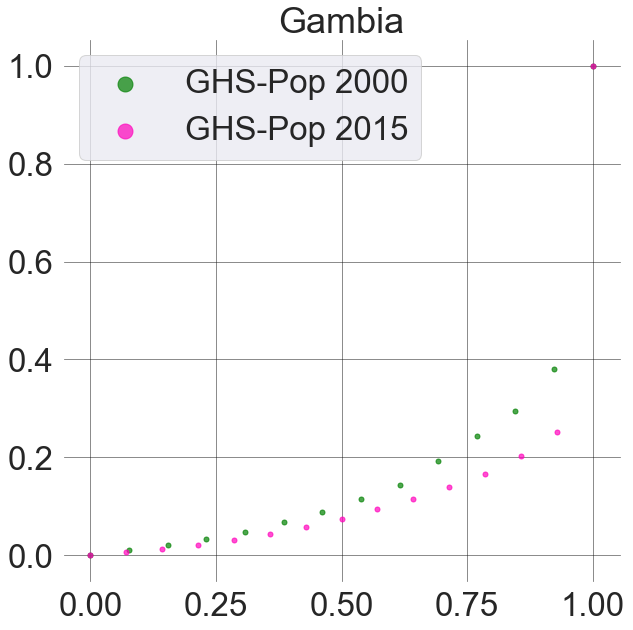

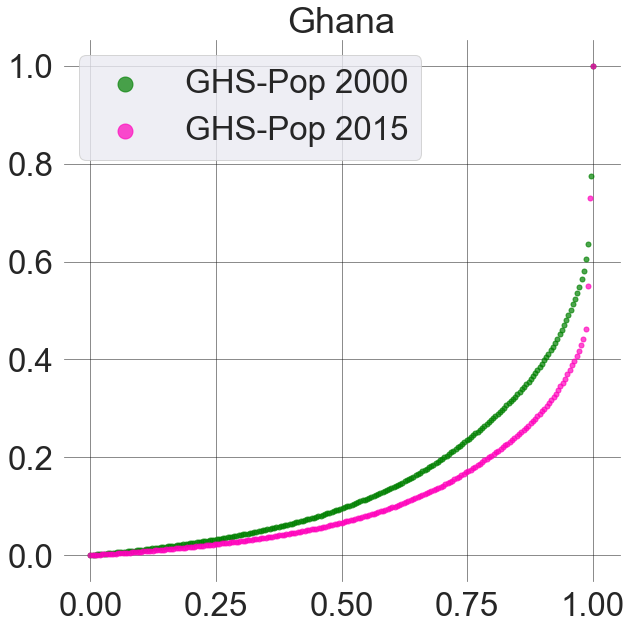

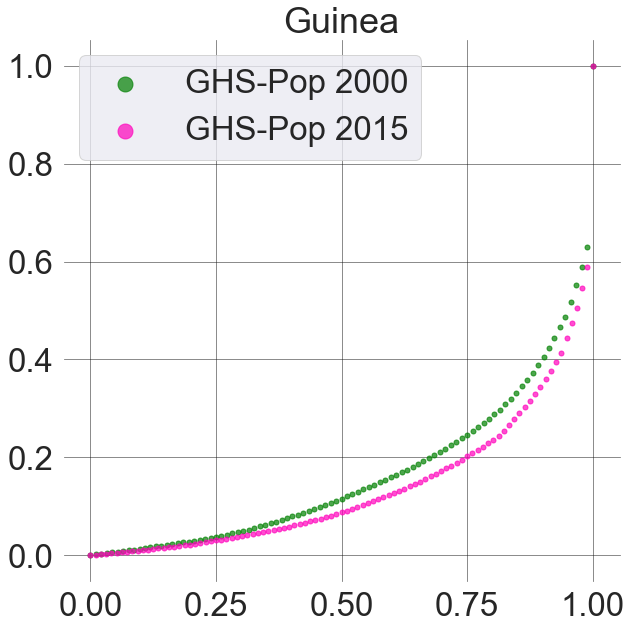

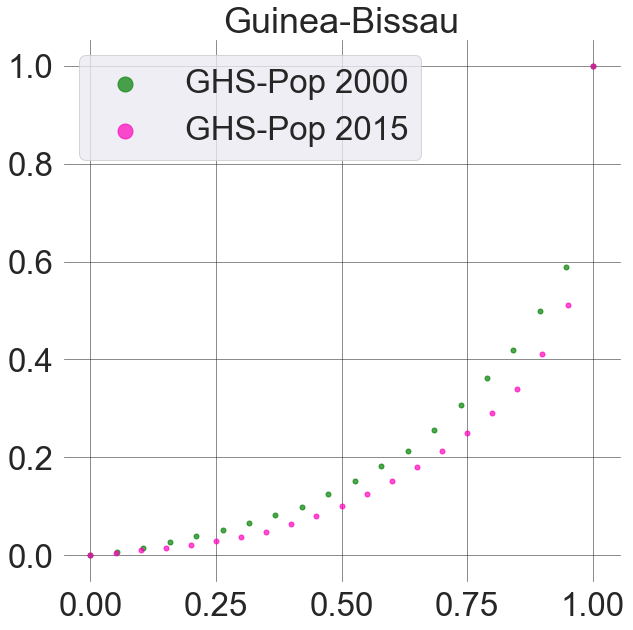

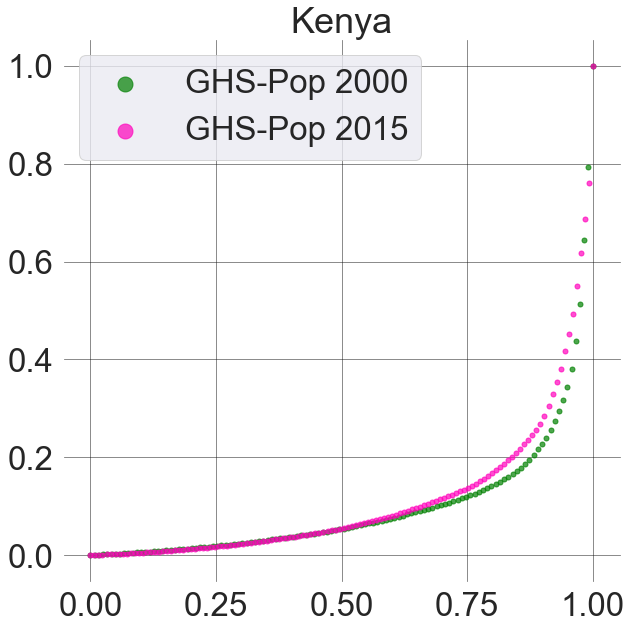

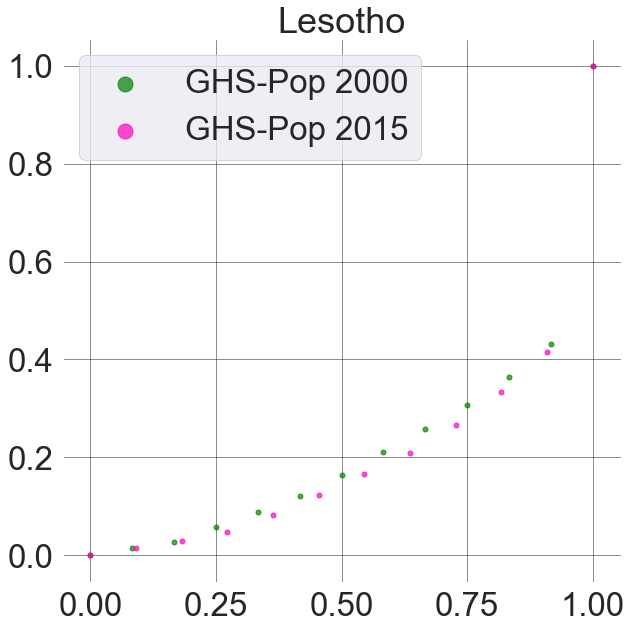

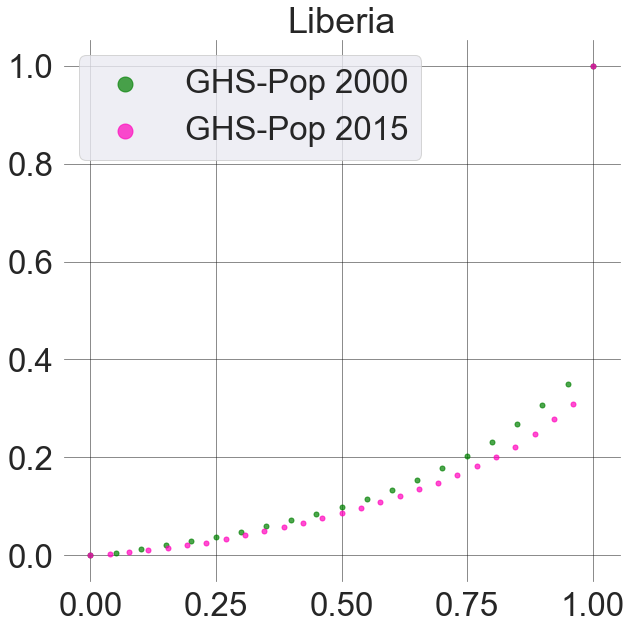

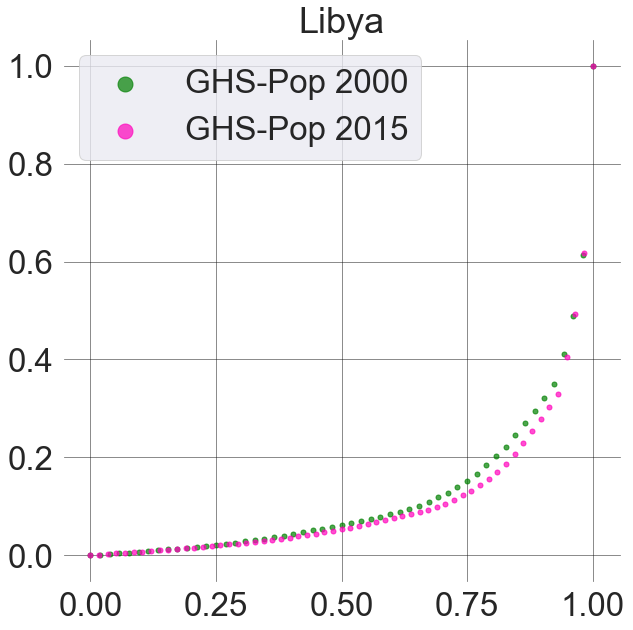

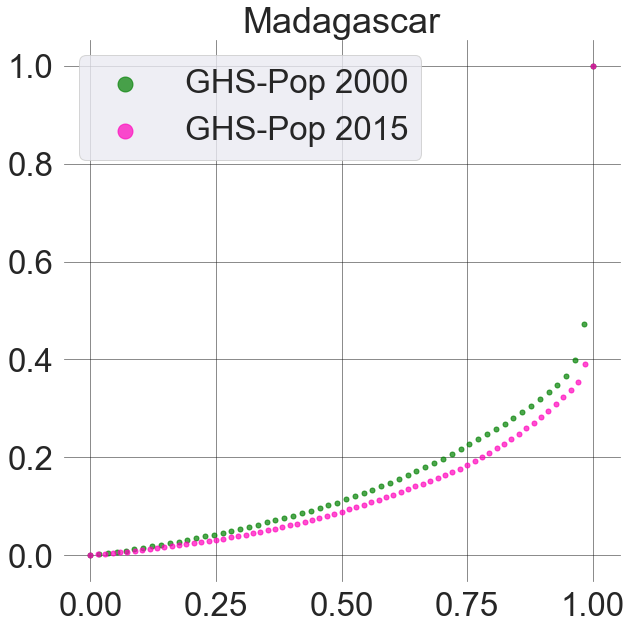

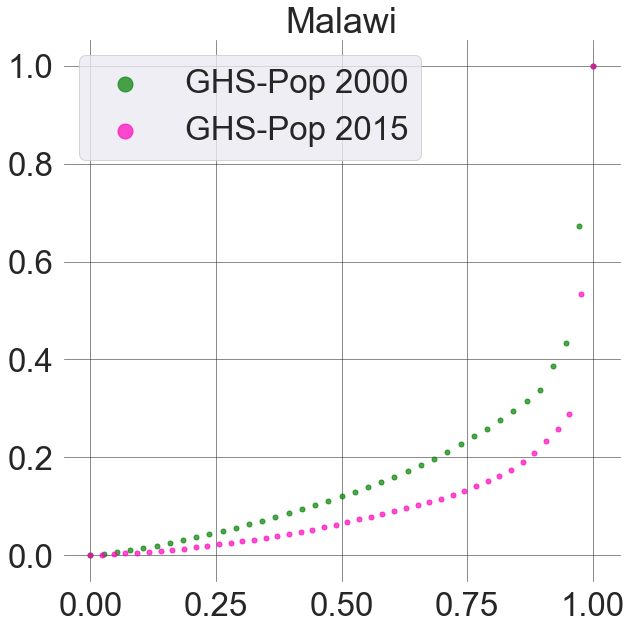

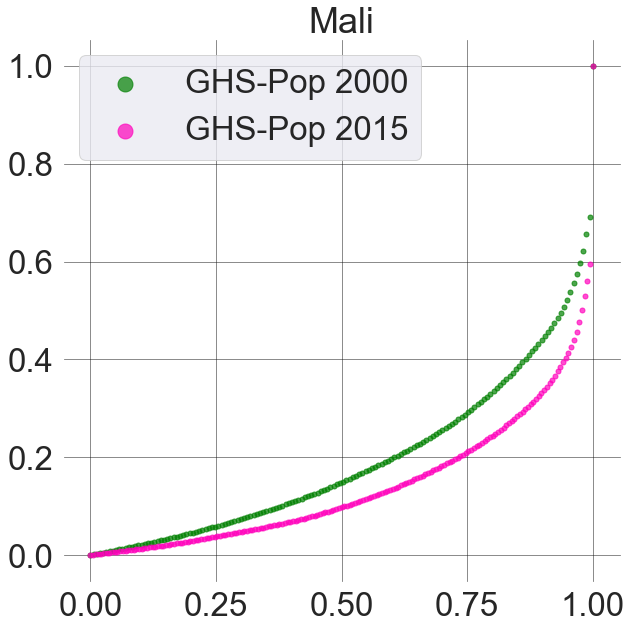

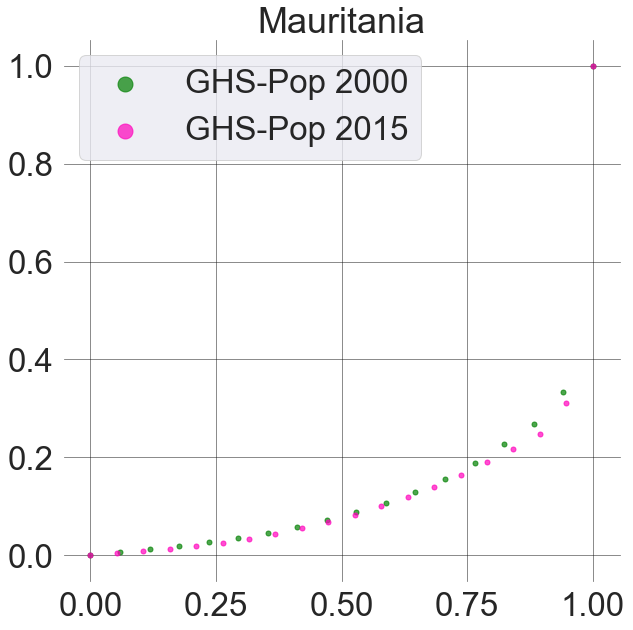

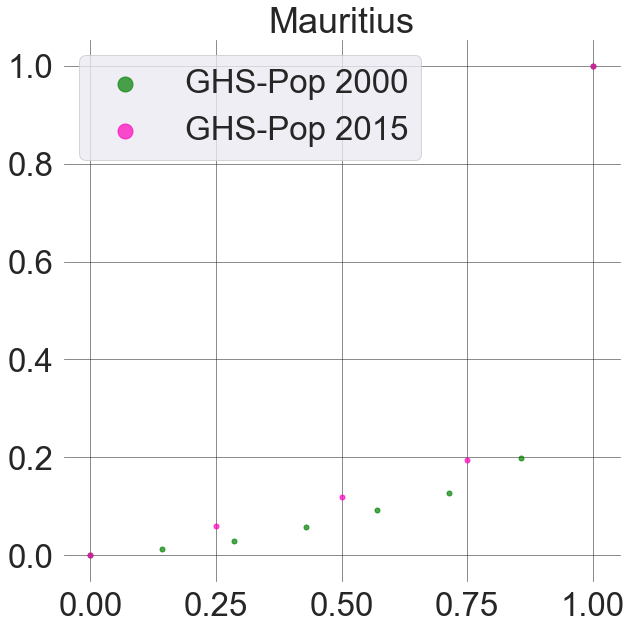

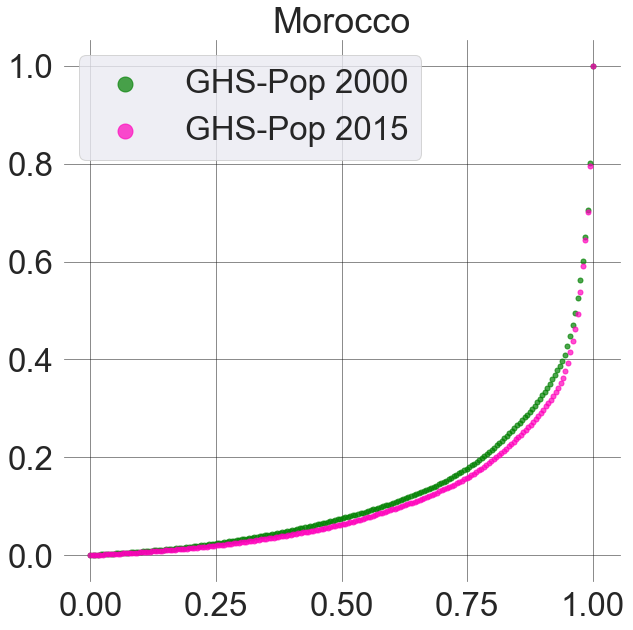

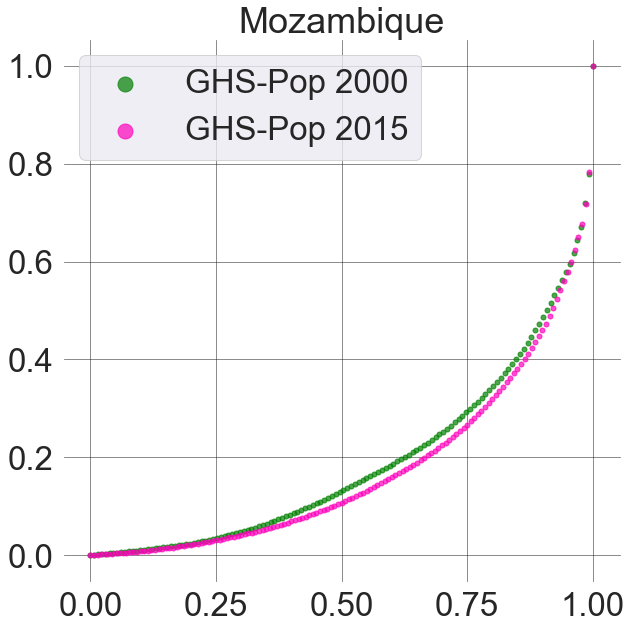

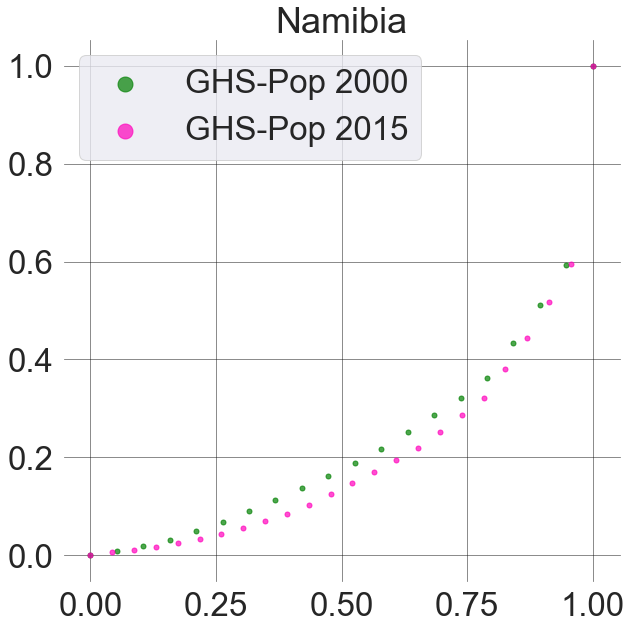

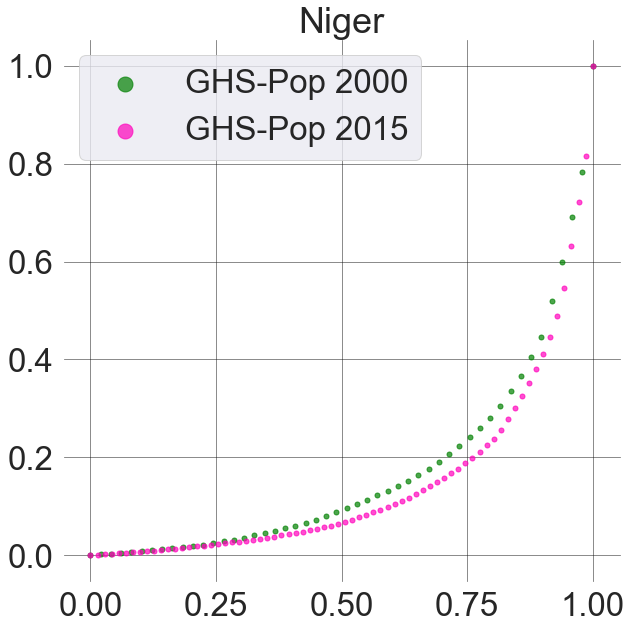

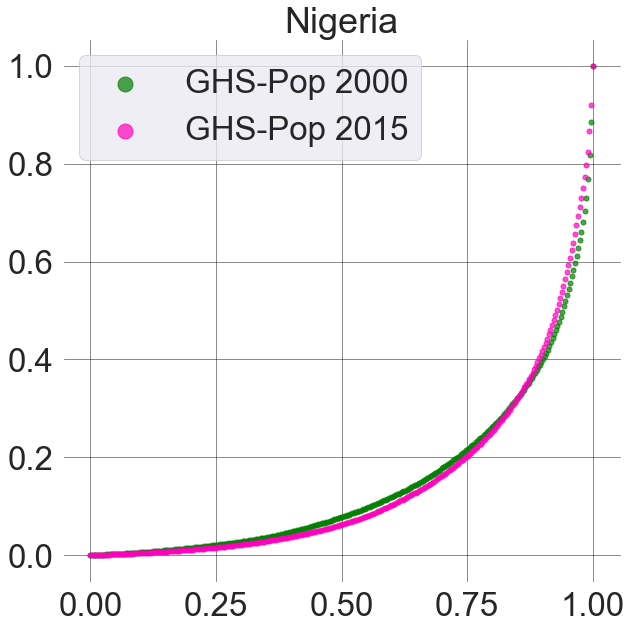

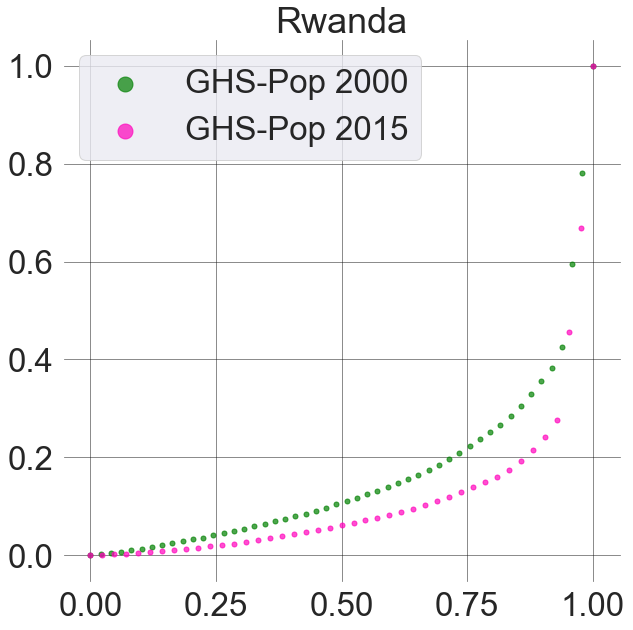

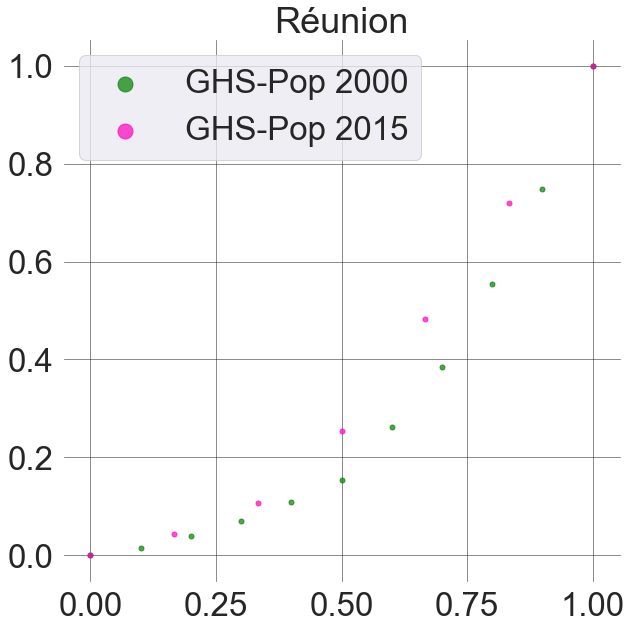

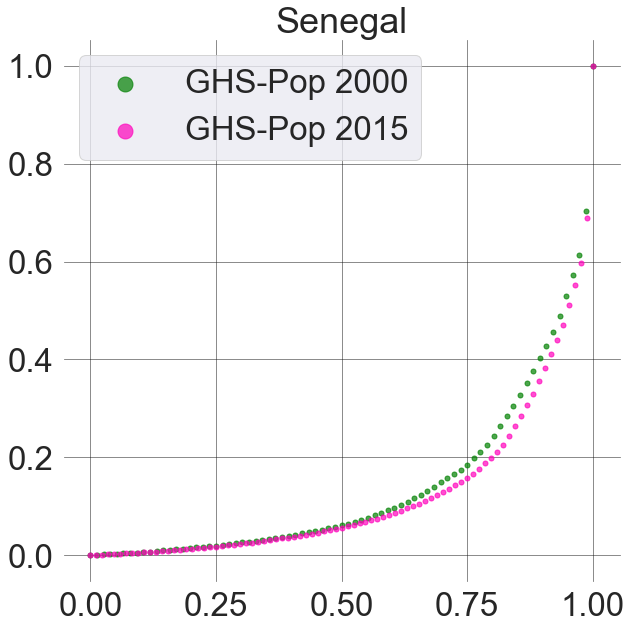

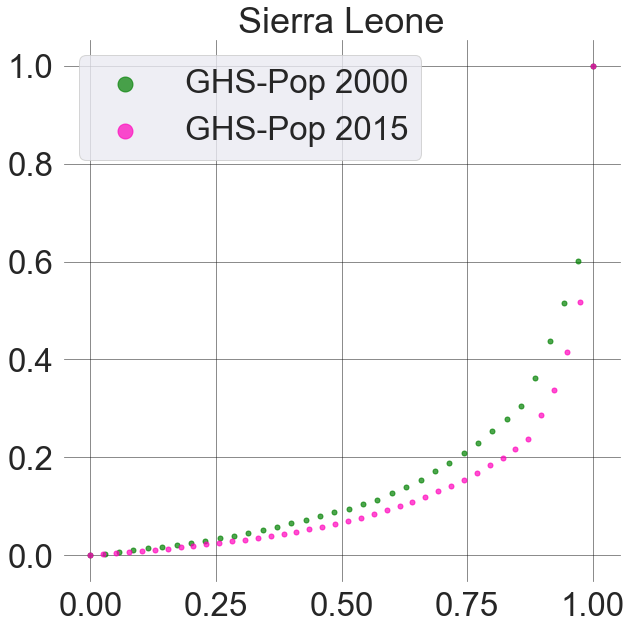

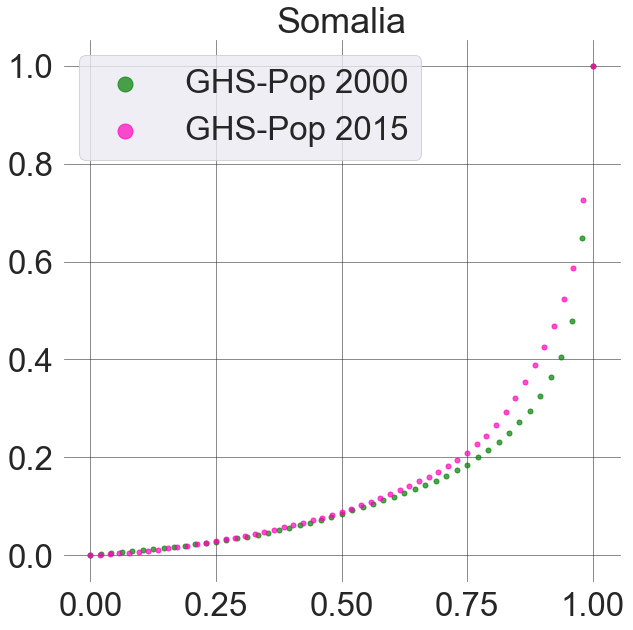

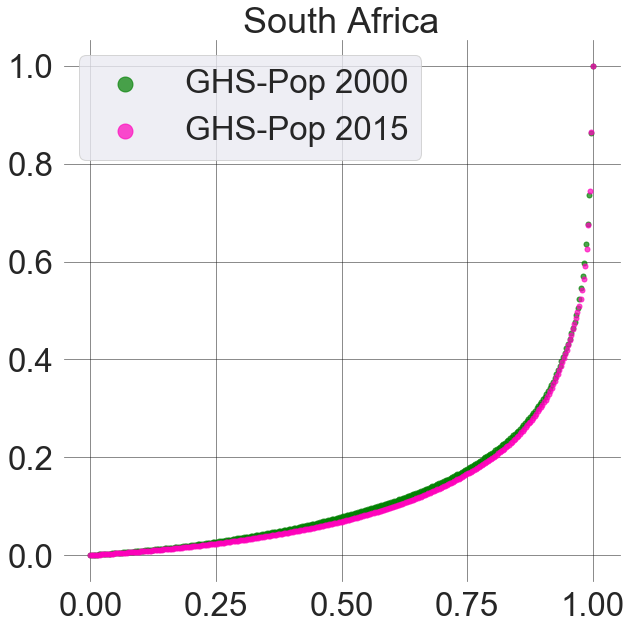

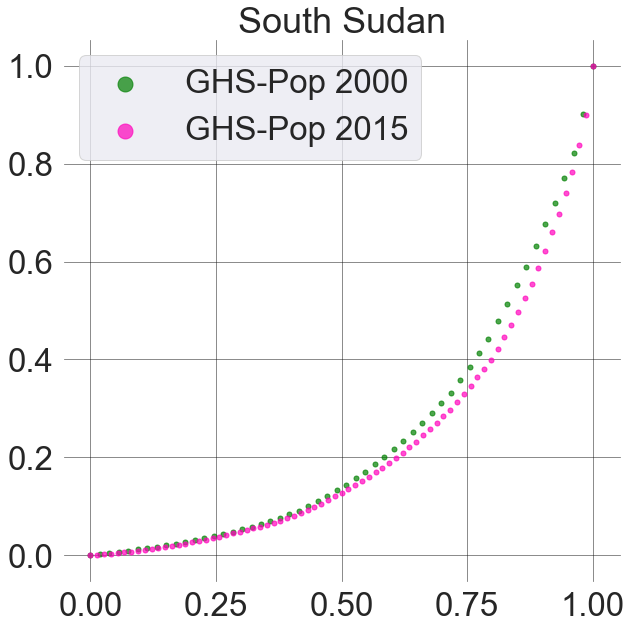

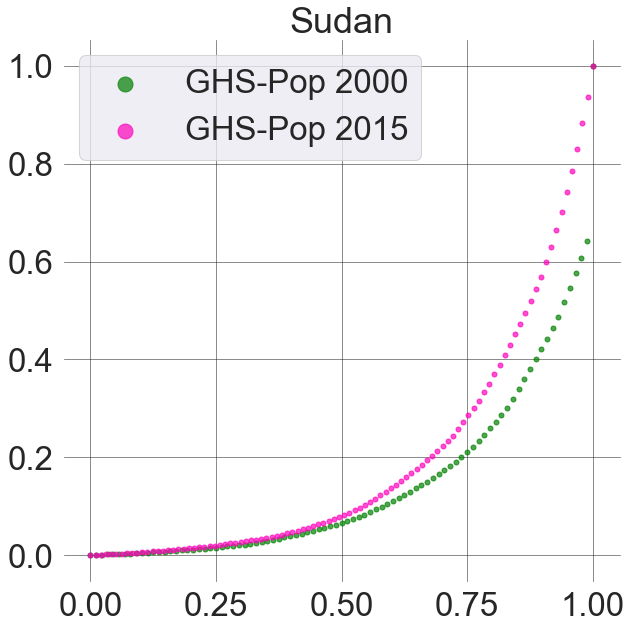

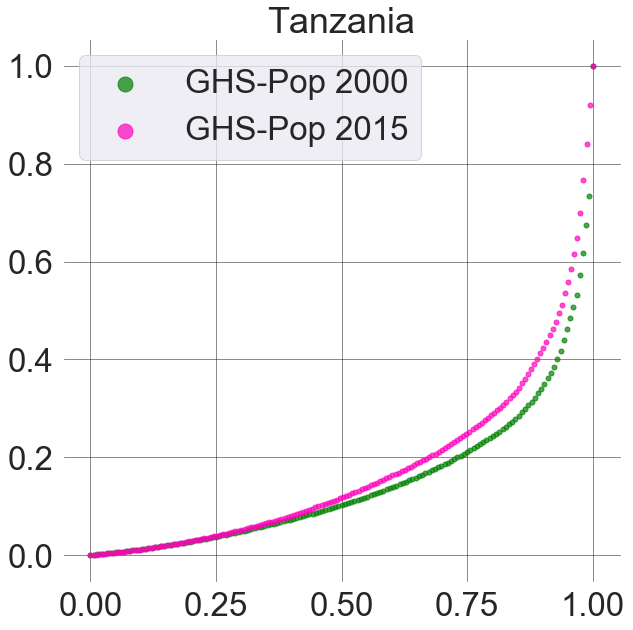

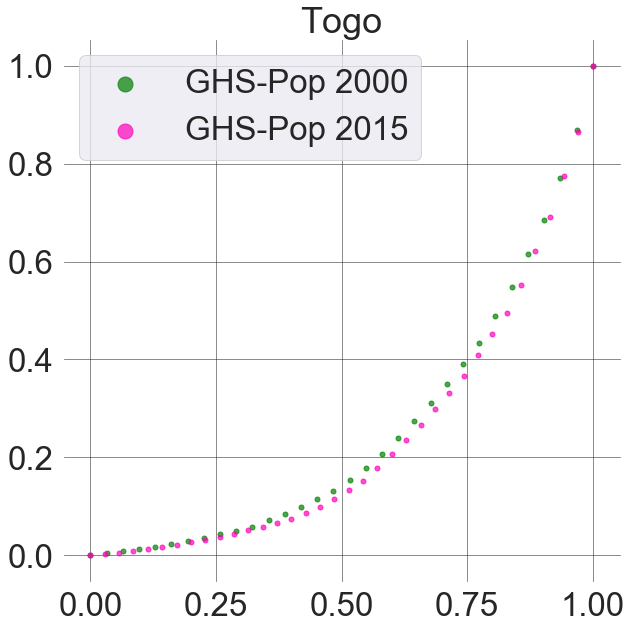

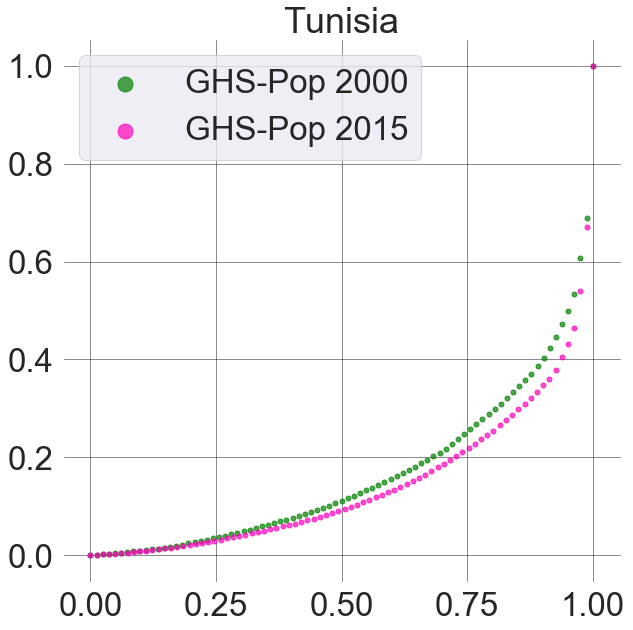

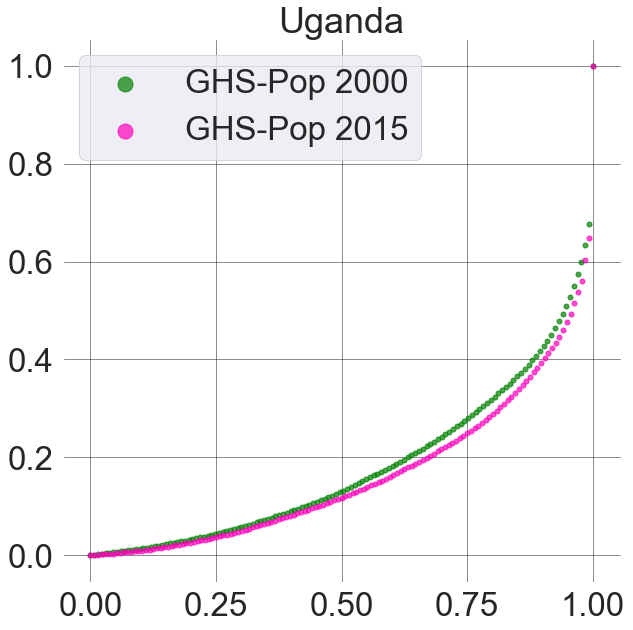

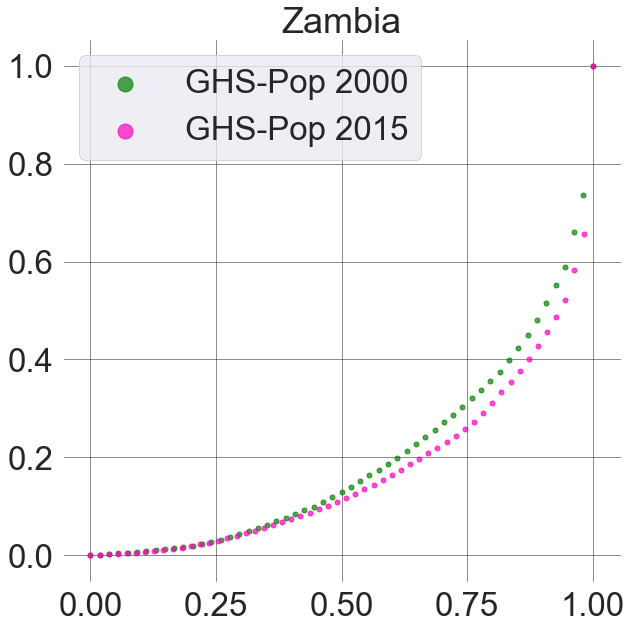

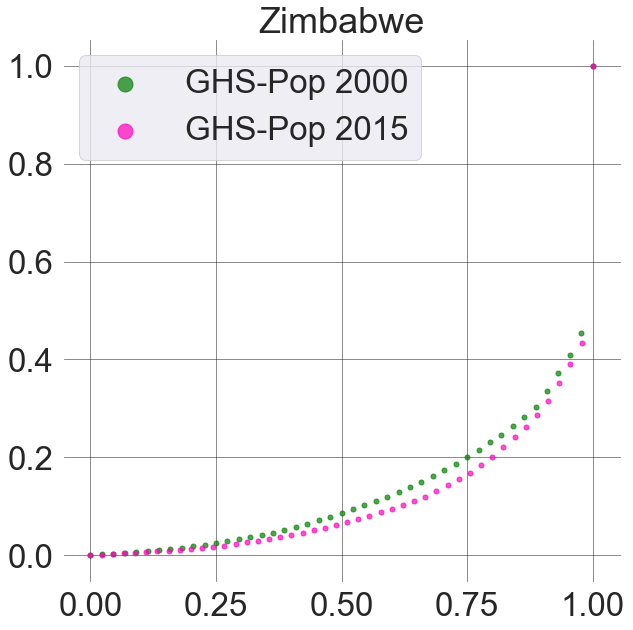

In [41]:
# Lorenz for All Countries

data1 = GHS2000[GHS2000.PopTot < 5*10**6]
data2 = GHS2015[GHS2015.PopTot < 5*10**6]

for country in countries: 
    
    test1 = data1[data1['country'] == country]
    test2 = data2[data2['country'] == country]

    X = np.sort(np.array(test1.PopTot))
    Y = np.sort(np.array(test2.PopTot))
    
    # Data for curve one
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    X_lorenz[0], X_lorenz[-1]

    # Data for curve two 
    Y_lorenz = Y.cumsum() / Y.sum()
    Y_lorenz = np.insert(Y_lorenz, 0, 0)
    Y_lorenz[0], Y_lorenz[-1]
    
    # Lorenz Curve Plot

    ## Size & number
    sns.set(font_scale=3)
    fig, ax1 = plt.subplots(nrows=1, ncols=1,  figsize=(10, 10))


    # Curve Plots
    # Alpha for Botswana and S. Leone is 0.7, else 0.5
    ax1.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
               marker='.', color='Green', s=100, alpha = 0.7)

    ax1.scatter(np.arange(Y_lorenz.size)/(Y_lorenz.size-1), Y_lorenz, 
               marker='.', color='#ff01bc', s=100, alpha = 0.7)

    # Title
    plt.title(country)


    # Legend
    leg = ['GHS-Pop 2000', 'GHS-Pop 2015']
    plt.legend(leg,loc=2, markerscale=3)

    # Set Color
    plt.grid(b=True, color = 'k', alpha = 0.5, marker = '.')

    # plt.setp(ax1.xaxis.get_gridlines(), clip_path = [0,1])
    # plt.setp(ax1.yaxis.get_gridlines(), clip_path = [[0,0], [1,1]])
    plt.figure.frameon = True
    ax1.set_facecolor('White')


    fig.savefig('/Users/cascade/Desktop/'+country+'_Lorenz.png', dpi=300)

In [ ]:
# Decriptives

for country in countries: 
    
    print(country)

    test1 = GHS2000[GHS2000['country'] == country]
    test1 = test1[test1.PopTot <5*10**6]
    test2 = GHS2015[GHS2015['country'] == country]
    test2 = test2[test2.PopTot <5*10**6]
    
    print(test1.PopTot.count())
    print(test2.PopTot.count())
    print(test1.PopTot.median())
    print(test2.PopTot.median())
    
    # gini coef. 
    print(gini((test1.PopTot)))
    print(gini((test2.PopTot)))

In [12]:
for country in countries: 
    data1 = np.sort(np.array(GHS2000[GHS2000['country'] == country].PopTot))
    data2 = np.sort(np.array(GHS2015[GHS2015['country'] == country].PopTot))
    
    # Order the data for Zipf's law
    X1_zipf = data1 #sort the values
    Y1_zipf = list(range(1, len(X1_zipf)+1)) # make a range
    Y1_zipf = Y1_zipf[::-1] # Re order range

    X1_zipf_log = np.log(X1_zipf)
    Y1_zipf_log = np.log(Y1_zipf)

    X2_zipf = data2
    Y2_zipf = list(range(1, len(X2_zipf)+1))
    Y2_zipf = Y2_zipf[::-1]

    X2_zipf_log = np.log(X2_zipf)
    Y2_zipf_log = np.log(Y2_zipf)
    
    fit1 = ss.linregress(X1_zipf_log, Y1_zipf_log)
    fit2 = ss.linregress(X2_zipf_log, Y2_zipf_log)

    print(country)
    print(fit1[0]) # Slope 2000
    print(fit1[2]) # R2 2000
    print(fit1[4]) # p val 2000
    print(fit2[0]) # Slope 2015
    print(fit2[2]) # R2 2000
    print(fit2[4]) # p val 2015

Algeria
-1.0077207298635813
-0.9833517327138834
0.009022167703949023
-0.9154381707191884
-0.9742935894023383
0.01057045236607458
Angola
-0.6526026199488919
-0.9443693861472292
0.027164655788145715
-0.6448680310427137
-0.9696148488095379
0.018305407443765548
Benin
-0.7020831681139091
-0.9804000155206869
0.01651308232427366
-0.6379349791488176
-0.9779813789657492
0.015315756122763606
Botswana
-0.6202027235118525
-0.8623606115687809
0.08831277927169089
-0.9707267568202914
-0.9146785305542778
0.11464142990681016
Burkina Faso
-0.8256887296639442
-0.9434487228243813
0.0344331404046193
-0.8120560056332115
-0.9527008496202709
0.028962027662617292
Burundi
-1.0916529543936746
-0.9471211765060195
0.03898478780827704
-0.9106845142963953
-0.9688040183795729
0.02415689532040982
Cameroon
-0.7475573084867857
-0.9769537594433653
0.014972533850366499
-0.6883876427760336
-0.9791355734668036
0.012881863095560235
Cape Verde
-1.1377103140311347
-0.9732483150836372
0.10964752931158624
-1.0471992616148427
-0.

/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:117: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [ ]:
bigcity = GHS2015[GHS2015.PopTot >= 5*10**6]

city = GHS2000[GHS2000['country'] == 'Tanzania']
city.sort_values('PopTot', ascending = False)

In [ ]:
# All Africa

test1 = GHS2000
test2 = GHS2015

print(test1.PopTot.count())
print(test2.PopTot.count())
print(test1.PopTot.median())
print(test2.PopTot.median())

# gini coef. 
print(gini((test1.PopTot)))
print(gini((test2.PopTot)))

In [ ]:
# All Africa 

data1 = np.sort(np.array(GHS2000.PopTot))
data2 = np.sort(np.array(GHS2015.PopTot))

# Order the data for Zipf's law
X1_zipf = data1 #sort the values
Y1_zipf = list(range(1, len(X1_zipf)+1)) # make a range
Y1_zipf = Y1_zipf[::-1] # Re order range

X1_zipf_log = np.log(X1_zipf)
Y1_zipf_log = np.log(Y1_zipf)

X2_zipf = data2
Y2_zipf = list(range(1, len(X2_zipf)+1))
Y2_zipf = Y2_zipf[::-1]

X2_zipf_log = np.log(X2_zipf)
Y2_zipf_log = np.log(Y2_zipf)

fit1 = ss.linregress(X1_zipf_log, Y1_zipf_log)
fit2 = ss.linregress(X2_zipf_log, Y2_zipf_log)

print('Africa')
print(fit1[0]) # Slope 2000
print(fit1[2]) # R2 2000
print(fit1[4]) # p val 2000
print(fit2[0]) # Slope 2015
print(fit2[2]) # R2 2000
print(fit2[4]) # p val 2015

In [ ]:
fit1

In [ ]:


rain = GHS2015[GHS2015['rain_zone'] == 'Arid']
rain = rain[rain.PopTot < 5*10**6]

gini(rain.PopTot)

# Old Code

In [ ]:
# test = GHS2000[GHS2000['PopTot'] < 5*10**6]
# out = test.groupby('country').PopTot.agg(gini)
# gini2015_df['gini-00'] = out.values

In [ ]:
# gini2015_df = pd.DataFrame()
# gini2015_df['country'] = out.keys()
# gini2015_df['gini-15'] = out.values

In [ ]:
# out.keys()

In [ ]:
# gini2015_df['gini-dif'] = gini2015_df['gini-15'] - gini2015_df['gini-00']

In [ ]:
# gini2015_df

In [ ]:
# fao_ag = pd.read_csv(data_temp+'Macro-Statistics_Key_Indicators_E_Africa.csv')

In [ ]:
# Value added as share gpd 2010 prices

# value = fao_ag.loc[(fao_ag['Item Code'] == 22016) & (fao_ag['Element Code'] == 6169)]

In [ ]:
# ag2000_df = value.filter(['Area', 'Y2000'])
# ag2000_df.columns = ag_df.columns.str.replace('Area', 'country')

In [ ]:
# ag_result = pd.merge(ag2000_df, ag2015_df, on='country', how='inner')
# ag_result

In [ ]:
# result = pd.merge(gini_df, ag_df, on='country', how='inner')

In [ ]:
# plt.scatter(result.gini, result.Y2015, marker='.', color='Red', s=100, alpha = 0.5)
# plt.xlabel('Urban Settlement Gini Coeff by Country 2015')
# plt.ylabel('Value added by Agriculture as Share of GDP')